In [221]:
import json
import glob
import pandas as pd

In [222]:
# Get list of all JSON files in parent directory
json_files = glob.glob('../scraped_data/*.json')

# Print the filenames
print("JSON files found:")
for file in json_files:
    print(f"- {file}")


JSON files found:
- ../scraped_data\coolcharm_schedule_20250509_182420.json
- ../scraped_data\coolcharm_schedule_20250510_140500.json
- ../scraped_data\coolcharm_schedule_20250510_141110.json
- ../scraped_data\coolcharm_schedule_20250510_143203.json
- ../scraped_data\coolcharm_schedule_20250510_150803.json
- ../scraped_data\coolcharm_schedule_20250510_180237.json
- ../scraped_data\coolcharm_schedule_20250511_040611.json
- ../scraped_data\coolcharm_schedule_20250516_081432.json
- ../scraped_data\coolcharm_schedule_20250516_082152.json
- ../scraped_data\coolcharm_schedule_20250516_100914.json
- ../scraped_data\coolcharm_schedule_20250516_160336.json
- ../scraped_data\coolcharm_schedule_20250517_100905.json
- ../scraped_data\coolcharm_schedule_20250517_160455.json
- ../scraped_data\coolcharm_schedule_20250520_141715.json
- ../scraped_data\coolcharm_schedule_20250520_160452.json
- ../scraped_data\coolcharm_schedule_20250521_040719.json
- ../scraped_data\coolcharm_schedule_20250521_100920.j

In [223]:
import pandas as pd
import glob
import os
import re

# Find all JSON files in the folder
json_files = glob.glob('../scraped_data/*.json')

# Store grouped DataFrames
dfs_by_store = {'coolcharm': [], 'koepel': [], 'rite': []}

# Regex pattern to extract datetime from file name
datetime_pattern = re.compile(r'(\d{8}_\d{6})')

# Load each file and assign to the right store
for file in json_files:
    filename = os.path.basename(file)

    # Extract store type
    if filename.startswith('coolcharm'):
        store = 'coolcharm'
    elif filename.startswith('koepel'):
        store = 'koepel'
    elif filename.startswith('rite'):
        store = 'rite'
    else:
        continue  # Skip unknown files

    # Extract datetime string
    match = datetime_pattern.search(filename)
    scrape_dt = match.group(1).replace('_', ' ') if match else None

    # Read file and add columns
    df = pd.read_json(file)
    df['file_name'] = filename
    df['scrape_datetime'] = scrape_dt

    dfs_by_store[store].append(df)

# Combine the lists into single DataFrames
combined_dfs = {store: pd.concat(df_list, ignore_index=True) for store, df_list in dfs_by_store.items()}


In [224]:
for df in combined_dfs.values():
    df['scrape_datetime'] = pd.to_datetime(df['scrape_datetime'], format='%Y%m%d %H%M%S')


In [225]:
koepel_df = combined_dfs['koepel']
rite_df = combined_dfs['rite']
coolcharm_df = combined_dfs['coolcharm']


In [226]:
rite_df[rite_df['date'] == pd.to_datetime('2025-06-01')]

,name,date,hour,address,instructor,availability,file_name,scrape_datetime


In [227]:
rite_df[rite_df['date'] == pd.to_datetime('2025-01-06')]

,name,date,hour,address,instructor,availability,file_name,scrape_datetime
10580,REFORM - ANTWERP,2025-01-06 00:00:00,08:00 - 08:50,"Riemstraat 13, Antwerp",Véronique B.,11 / 19,rite_schedule_20250525_160603.json,2025-05-25 16:06:03
10581,REFORM - BRASSCHAAT,2025-01-06 00:00:00,08:00 - 08:50,Bredabaan 259,Lara D.W.,19 / 20,rite_schedule_20250525_160603.json,2025-05-25 16:06:03
10582,REFORM - GHENT SOUTH,2025-01-06 00:00:00,08:00 - 08:50,Zuidstationstraat 18,Sophie V.B.,10 / 17,rite_schedule_20250525_160603.json,2025-05-25 16:06:03
10583,REFORM - ANTWERP,2025-01-06 00:00:00,09:00 - 09:50,"Riemstraat 13, Antwerp",Véronique B.,19 / 19,rite_schedule_20250525_160603.json,2025-05-25 16:06:03
10584,REFORM - BRASSCHAAT,2025-01-06 00:00:00,09:00 - 09:50,Bredabaan 259,Lara D.W.,20 / 20,rite_schedule_20250525_160603.json,2025-05-25 16:06:03
...,...,...,...,...,...,...,...,...
14085,REFORM - ANTWERP,2025-01-06 00:00:00,14:00 - 14:50,"Riemstraat 13, Antwerp",Nienke D.B.,19 / 19,rite_schedule_20250601_101015.json,2025-06-01 10:10:15
14086,REFORM - ANTWERP,2025-01-06 00:00:00,15:00 - 15:50,"Riemstraat 13, Antwerp",Jill D.,19 / 19,rite_schedule_20250601_101015.json,2025-06-01 10:10:15
14087,REFORM - ANTWERP,2025-01-06 00:00:00,16:00 - 16:50,"Riemstraat 13, Antwerp",Jill D.,15 / 19,rite_schedule_20250601_101015.json,2025-06-01 10:10:15
14088,REFORM - ANTWERP,2025-01-06 00:00:00,17:00 - 17:50,"Riemstraat 13, Antwerp",Jill D.,19 / 19,rite_schedule_20250601_101015.json,2025-06-01 10:10:15


In [228]:
rite_df['date'] = rite_df['date'].astype(str)


In [229]:
def swap_day_month(date_str):
    # If not a date (e.g., "TODAY"), keep original
    if not isinstance(date_str, str):
        return date_str
    try:
        # Try to parse as YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
        dt = pd.to_datetime(date_str, errors='raise')
        # Swap day and month
        swapped = dt.replace(month=dt.day, day=dt.month)
        # Keep the same format as input
        if " " in date_str:
            return swapped.strftime("%Y-%m-%d %H:%M:%S")
        else:
            return swapped.strftime("%Y-%m-%d")
    except Exception:
        # If parsing fails, return original
        return date_str

rite_df['date'] = rite_df['date'].apply(swap_day_month)

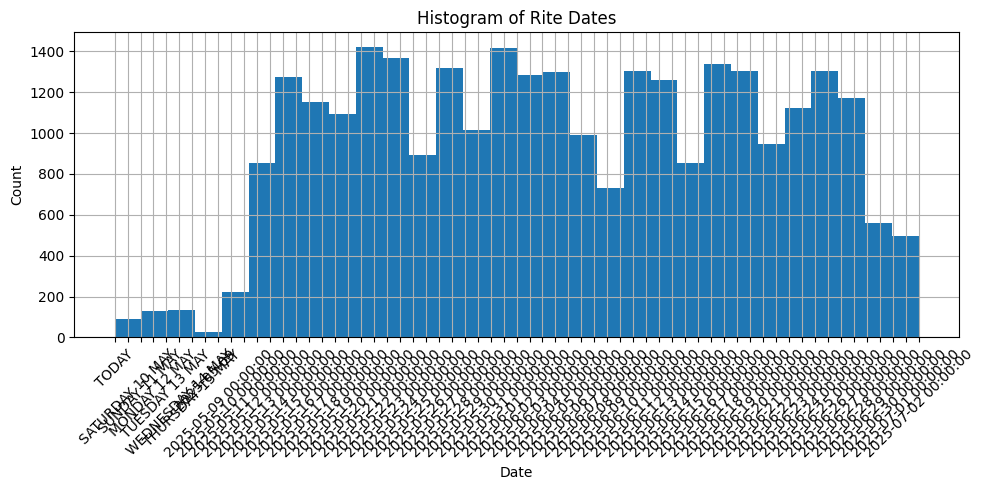

In [230]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'date' column in rite_df
plt.figure(figsize=(10, 5))
rite_df['date'].hist(bins=30)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Histogram of Rite Dates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [231]:
# Sort by scrape_datetime so the most recent comes last
koepel_df = koepel_df.sort_values('scrape_datetime')

# Group by class identifier
group_cols = ['date', 'time', 'instructor']
koepel_df_latest = koepel_df.groupby(group_cols, as_index=False).last()
koepel_df_latest.head(5)

,date,time,instructor,description,capacity,file_name,scrape_datetime
0,,,,,,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
1,dinsdag 03 juni,17:00 - 17:45,Gilltumn Vanhauwaert,None,4 / 4,koepel_schedule_20250608_041258.json,2025-06-08 04:12:58
2,dinsdag 03 juni,18:00 - 18:45,Gilltumn Vanhauwaert,None,4 / 4,koepel_schedule_20250608_041258.json,2025-06-08 04:12:58
3,dinsdag 03 juni,19:00 - 19:45,Gilltumn Vanhauwaert,None,4 / 4,koepel_schedule_20250608_101006.json,2025-06-08 10:10:06
4,dinsdag 03 juni,20:00 - 20:45,Gilltumn Vanhauwaert,None,4 / 4,koepel_schedule_20250608_101006.json,2025-06-08 10:10:06


In [232]:
from datetime import datetime
import pandas as pd

def fix_rite_date(date_val, scrape_dt):
    if isinstance(date_val, pd.Timestamp):
        return date_val.date()
    if isinstance(date_val, datetime):
        return date_val.date()
    if isinstance(date_val, str):
        if date_val.strip().upper() == "TODAY":
            return scrape_dt.date()
        # Try parsing as YYYY-MM-DD or YYYY-MM-DD HH:MM:SS
        try:
            return pd.to_datetime(date_val, format="%Y-%m-%d", errors="raise").date()
        except Exception:
            pass
        try:
            return pd.to_datetime(date_val, format="%Y-%m-%d %H:%M:%S", errors="raise").date()
        except Exception:
            pass
        # Try parsing as DAYNAME DD MONTH (e.g., SATURDAY 10 MAY)
        try:
            # Remove extra spaces and uppercase for uniformity
            parts = date_val.strip().upper().split()
            if len(parts) == 3:
                # e.g., SATURDAY 10 MAY
                dayname, day, month = parts
                # Compose a date string with the current year
                date_str = f"{day} {month} {scrape_dt.year}"
                return datetime.strptime(date_str, "%d %B %Y").date()
        except Exception:
            pass
    return pd.NaT

# Apply the function row-wise
rite_df['date'] = rite_df.apply(lambda row: fix_rite_date(row['date'], row['scrape_datetime']), axis=1)

# Drop rows where date could not be parsed
rite_df = rite_df.dropna(subset=['date'])

# Format as YYYY-MM-DD string
rite_df['date'] = pd.to_datetime(rite_df['date']).dt.strftime('%Y-%m-%d')

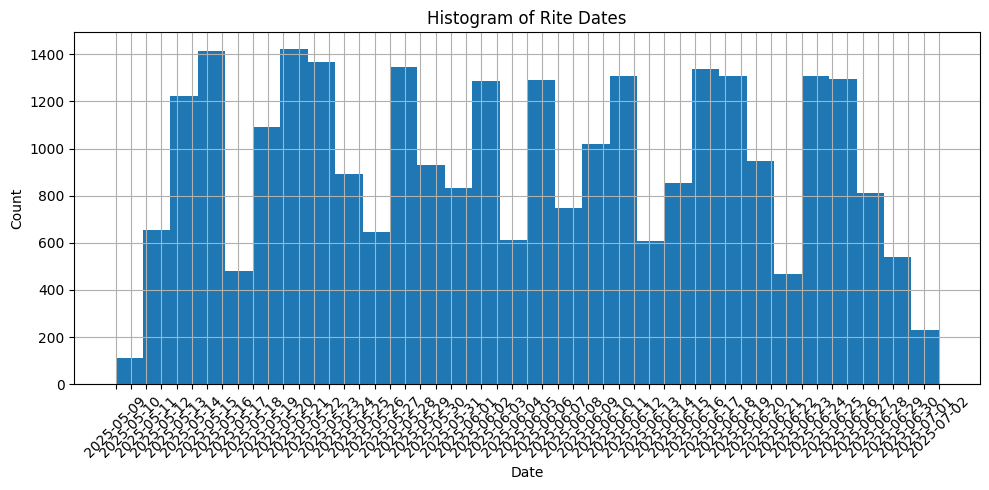

In [233]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'date' column in rite_df
plt.figure(figsize=(10, 5))
rite_df['date'].hist(bins=30)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Histogram of Rite Dates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [234]:
# Identify rows where the 'date' column is unparsable
unparsable_dates = rite_df[~pd.to_datetime(rite_df['date'], errors='coerce').notna()]

# Display the rows with unparsable dates
unparsable_dates.date.value_counts()

Series([], Name: count, dtype: int64)

In [235]:
# Sort by scrape_datetime to keep the most recent per class
rite_df_sorted = rite_df.sort_values(by='scrape_datetime')

# Define class keys
class_keys = ['name', 'date', 'hour', 'address', 'instructor']

# Drop duplicates, keeping the last (most recent scrape)
rite_df_latest = rite_df_sorted.drop_duplicates(subset=class_keys, keep='last')

# Optional: reset index
rite_df_latest = rite_df_latest.reset_index(drop=True)


In [236]:
rite_df_latest.head()

,name,date,hour,address,instructor,availability,file_name,scrape_datetime
0,REFORM - GHENT SOUTH,2025-05-10,12:00 - 12:50,Zuidstationstraat 18,Maike T.,17 / 17,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
1,REFORM - ANTWERP,2025-05-10,13:00 - 13:50,"Riemstraat 13, Antwerp",Sophie V.B.,19 / 19,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
2,REFORM - BRASSCHAAT,2025-05-10,13:00 - 13:50,Bredabaan 259,Lieke H.,18 / 20,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
3,REFORM - GHENT SOUTH,2025-05-10,13:00 - 13:50,Zuidstationstraat 18,Maike T.,16 / 17,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
4,REFORM - ANTWERP,2025-05-10,14:00 - 14:50,"Riemstraat 13, Antwerp",Sophie V.B.,19 / 19,rite_schedule_20250509_162319.json,2025-05-09 16:23:19


In [237]:
coolcharm_df

,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status
0,10/05/2025,10:00 - 10:55,Tower mixed level (All levels),Genk,4 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
1,10/05/2025,11:00 - 11:55,Reformer Mixed Level (All levels),Genk,0 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
2,11/05/2025,09:00 - 09:55,Tower mixed level (All levels),Genk,1 / 6,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
3,11/05/2025,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,4 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
4,12/05/2025,09:00 - 09:55,Tower mixed level (All levels),Genk,3 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,SATURDAY 12 JULY,11:00 - 11:50,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Reformer Tone (All Levels),Book
19558,SUNDAY 13 JULY,09:00 - 09:50,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Mat + Tower (All Levels),Book
19559,SUNDAY 13 JULY,10:00 - 10:50,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Reformer (All Levels),Book
19560,SUNDAY 13 JULY,11:00 - 11:50,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Reformer Tone (All Levels),Book


In [238]:
# Print all dates that are parseable to date
parsable_dates = pd.to_datetime(coolcharm_df['date'], errors='coerce').dropna()
print("Parsable Dates:")
print(parsable_dates)

# Print all dates that are not parseable to date
unparsable_dates = coolcharm_df['date'][pd.to_datetime(coolcharm_df['date'], errors='coerce').isna()]
print("\nUnparsable Dates:")
print(unparsable_dates)

Parsable Dates:
0       2025-10-05
1       2025-10-05
2       2025-11-05
3       2025-11-05
4       2025-12-05
           ...    
19447   2025-10-07
19448   2025-11-07
19449   2025-11-07
19450   2025-12-07
19451   2025-12-07
Name: date, Length: 6215, dtype: datetime64[ns]

Unparsable Dates:
9              13/05/2025
10             13/05/2025
11             13/05/2025
12             13/05/2025
13             13/05/2025
               ...       
19557    SATURDAY 12 JULY
19558      SUNDAY 13 JULY
19559      SUNDAY 13 JULY
19560      SUNDAY 13 JULY
19561      SUNDAY 13 JULY
Name: date, Length: 13347, dtype: object


In [239]:
import pandas as pd
import numpy as np
import re

# Try direct parse first
coolcharm_df['date_clean'] = pd.to_datetime(coolcharm_df['date'], errors='coerce', dayfirst=True)

# Handle strings like "SATURDAY 7 JUNE"
def parse_fallback_date(s):
    s = str(s).strip().upper()
    match = re.search(r'(\d{1,2})\s+([A-Z]+)', s)
    if match:
        day = int(match.group(1))
        month_str = match.group(2)
        month_map = {
            'JANUARY': 1, 'FEBRUARY': 2, 'MARCH': 3, 'APRIL': 4,
            'MAY': 5, 'JUNE': 6, 'JULY': 7, 'AUGUST': 8,
            'SEPTEMBER': 9, 'OCTOBER': 10, 'NOVEMBER': 11, 'DECEMBER': 12
        }
        month = month_map.get(month_str, None)
        if month:
            year = 2025  # assumed year
            return pd.Timestamp(year=year, month=month, day=day)
    return pd.NaT

# Apply fallback for unparsable rows
mask = coolcharm_df['date_clean'].isna()
coolcharm_df.loc[mask, 'date_clean'] = coolcharm_df.loc[mask, 'date'].apply(parse_fallback_date)

# Replace original date with parsed version
coolcharm_df['date'] = coolcharm_df['date_clean']
coolcharm_df.drop(columns=['date_clean'], inplace=True)


In [240]:
# Sort by scrape_datetime
coolcharm_df_sorted = coolcharm_df.sort_values(by='scrape_datetime')

# Drop duplicates to keep most recent scrape per class
class_keys = ['date', 'time', 'class_name', 'location']
coolcharm_df_latest = coolcharm_df_sorted.drop_duplicates(subset=class_keys, keep='last')

# Optional cleanup
coolcharm_df_latest = coolcharm_df_latest.reset_index(drop=True)


In [241]:
coolcharm_df_latest

,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status
0,2025-05-10,10:00 - 10:55,Tower mixed level (All levels),Genk,4 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
1,2025-05-10,11:00 - 11:55,Reformer Mixed Level (All levels),Genk,0 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
2,2025-05-10,NaN,NaN,NaN,NaN,Book,Mat + Tower (All Levels),11:00 - 11:50,Antwerp,Lana,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
3,2025-05-11,09:00 - 09:55,Tower mixed level (All levels),Genk,1 / 6,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250510_180237.json,2025-05-10 18:02:37,NaN,NaN
4,2025-05-11,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,5 / 5,Full,NaN,NaN,NaN,NaN,coolcharm_schedule_20250510_180237.json,2025-05-10 18:02:37,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2025-07-13,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,4 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN
636,2025-07-14,09:00 - 09:55,Tower mixed level (All levels),Genk,1 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN
637,2025-07-14,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,0 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN
638,2025-07-14,18:30 - 19:25,Reformer Beginners (Level 1),Genk,2 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN


C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\3934107474.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\3934107474.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['date'].dt.day_name()
C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\3934107474.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

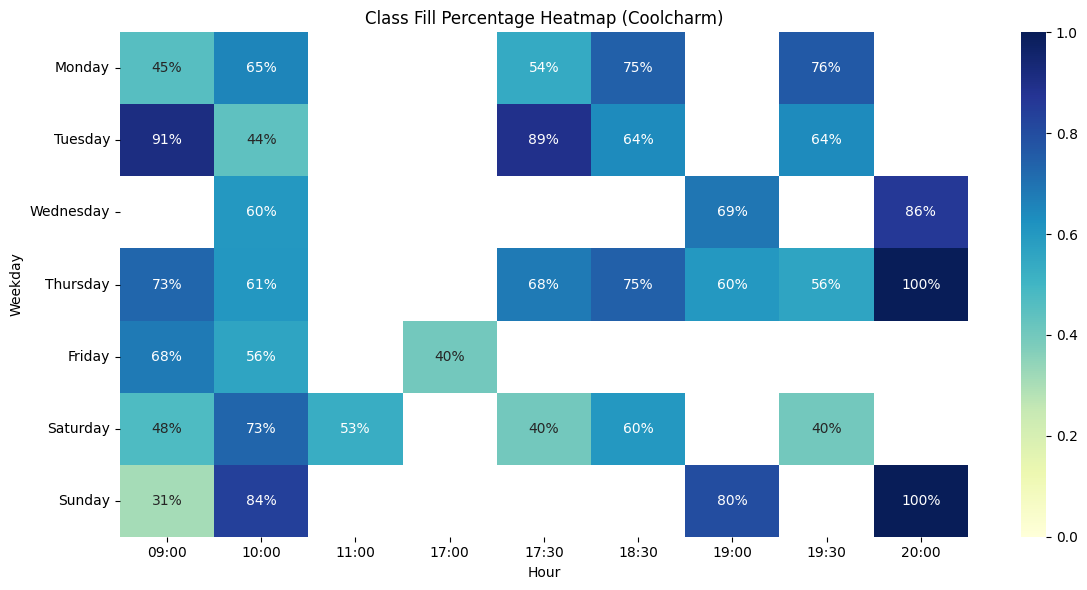

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fill_percentage_heatmap(df, title):
    # Remove entries with NaN values
    df = df.dropna(subset=['date', 'time', 'availability'])

    # Parse date and extract weekday
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['weekday'] = df['date'].dt.day_name()

    # Extract hour from 'time' (before the ' - ')
    df['hour'] = df['time'].str.split(' - ').str[0]

    # Convert availability string "x/y" to percentage float
    df[['available', 'total']] = df['availability'].str.split('/', expand=True).astype(int)
    df['fill_percentage'] = ((df['available'] / df['total']) * 10).round() / 10

    # Filter out entries with 0% fill percentage
    df = df[df['fill_percentage'] > 0]

    # Group by weekday and hour, take mean fill %
    pivot = df.groupby(['weekday', 'hour'])['fill_percentage'].mean().reset_index()

    # Pivot to matrix: weekdays as rows, hours as columns
    heatmap_data = pivot.pivot(index='weekday', columns='hour', values='fill_percentage')

    # Order weekdays manually
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex(weekday_order)

    # Sort hours (e.g., 09:00, 10:00, ...)
    heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="YlGnBu", vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel('Hour')
    plt.ylabel('Weekday')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_fill_percentage_heatmap(coolcharm_df_latest, 'Class Fill Percentage Heatmap (Coolcharm)')



In [243]:
# Sort by scrape_datetime
rite_df_sorted = rite_df.sort_values(by='scrape_datetime')

# Drop duplicates to keep most recent scrape per class
class_keys = ['date', 'hour', 'name', 'address']
rite_df_latest = rite_df_sorted.drop_duplicates(subset=class_keys, keep='last')

# Optional cleanup
rite_df_latest = rite_df_latest.reset_index(drop=True)

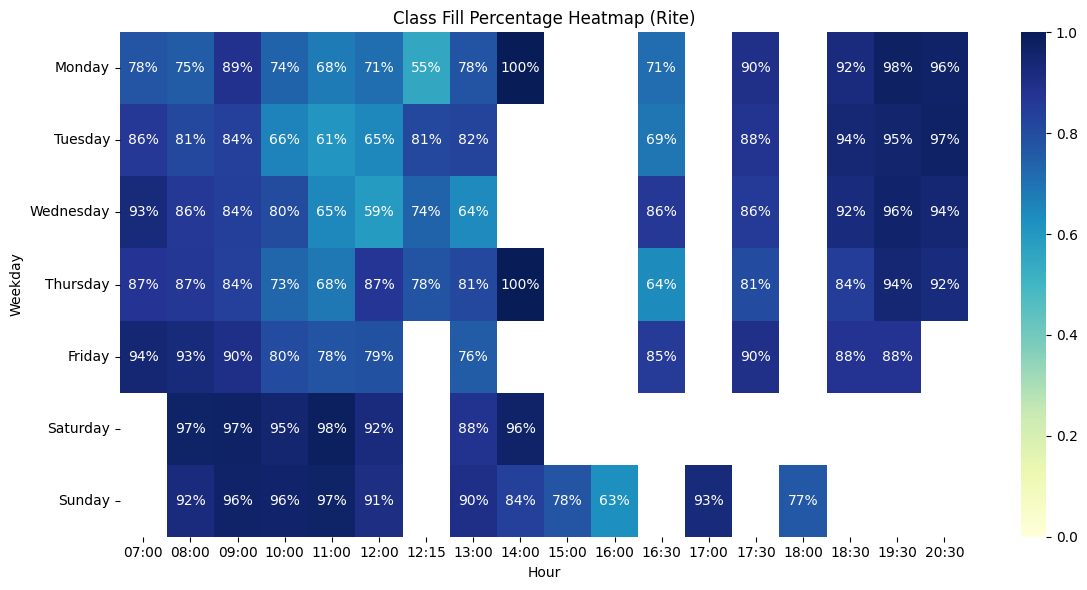

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fill_percentage_heatmap(df, title):
    # Remove entries with NaN values
    df = df.dropna(subset=['date', 'hour', 'availability'])

    # Parse date and extract weekday
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['weekday'] = df['date'].dt.day_name()

    # Extract hour from 'hour' (before the ' - ')
    df['hour'] = df['hour'].str.split(' - ').str[0]

    # Convert availability string "x/y" to percentage float
    df[['available', 'total']] = df['availability'].str.split('/', expand=True).astype(int)
    df['fill_percentage'] = ((df['available'] / df['total']) * 10).round() / 10

    # Filter out entries with 0% fill percentage
    df = df[df['fill_percentage'] > 0]

    # Group by weekday and hour, take mean fill %
    pivot = df.groupby(['weekday', 'hour'])['fill_percentage'].mean().reset_index()

    # Pivot to matrix: weekdays as rows, hours as columns
    heatmap_data = pivot.pivot(index='weekday', columns='hour', values='fill_percentage')

    # Order weekdays manually
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex(weekday_order)

    # Sort hours (e.g., 09:00, 10:00, ...)
    heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="YlGnBu", vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel('Hour')
    plt.ylabel('Weekday')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_fill_percentage_heatmap(rite_df_latest, 'Class Fill Percentage Heatmap (Rite)')

In [245]:
# Sort by scrape_datetime
koepel_df_sorted = koepel_df.sort_values(by='scrape_datetime')

# Drop duplicates to keep most recent scrape per class
class_keys = ['date', 'time', 'instructor', 'description']
koepel_df_latest = koepel_df_sorted.drop_duplicates(subset=class_keys, keep='last')

# Optional cleanup
koepel_df_latest = koepel_df_latest.reset_index(drop=True)

In [246]:
dag_mapping = {
    'maandag': 'Monday',
    'dinsdag': 'Tuesday',
    'woensdag': 'Wednesday',
    'donderdag': 'Thursday',
    'vrijdag': 'Friday',
    'zaterdag': 'Saturday',
    'zondag': 'Sunday'
}
maand_mapping = {
    'januari': 'January', 'februari': 'February', 'maart': 'March',
    'april': 'April', 'mei': 'May', 'juni': 'June',
    'juli': 'July', 'augustus': 'August', 'september': 'September',
    'oktober': 'October', 'november': 'November', 'december': 'December'
}
koepel_df_latest['date'] = koepel_df_latest['date'].astype(str).str.strip()
for nl, en in dag_mapping.items():
    koepel_df_latest['date'] = koepel_df_latest['date'].str.replace(nl, en, case=False)

for nl, en in maand_mapping.items():
    koepel_df_latest['date'] = koepel_df_latest['date'].str.replace(nl, en, case=False)

koepel_df_latest['date'] = pd.to_datetime(koepel_df_latest['date'], format='%A %d %B', errors='coerce')


In [247]:
koepel_df_latest

,description,date,time,capacity,instructor,file_name,scrape_datetime
0,Samen zullen we met behulp van een reformer in...,1900-05-06,19:00 - 19:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
1,Samen zullen we met behulp van een reformer in...,1900-05-06,20:00 - 20:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
2,Samen zullen we met behulp van een reformer in...,1900-05-10,15:00 - 15:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
3,Samen zullen we met behulp van een reformer in...,1900-05-10,11:00 - 11:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
4,,1900-05-10,13:00 - 13:45,1 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
...,...,...,...,...,...,...,...
324,NaN,1900-06-25,10:00 - 10:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
325,NaN,1900-06-25,09:00 - 09:45,2 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
326,NaN,1900-06-24,18:00 - 18:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
327,NaN,NaT,,,,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38


C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\3493364930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\3493364930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['date'].dt.day_name()
C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\3493364930.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

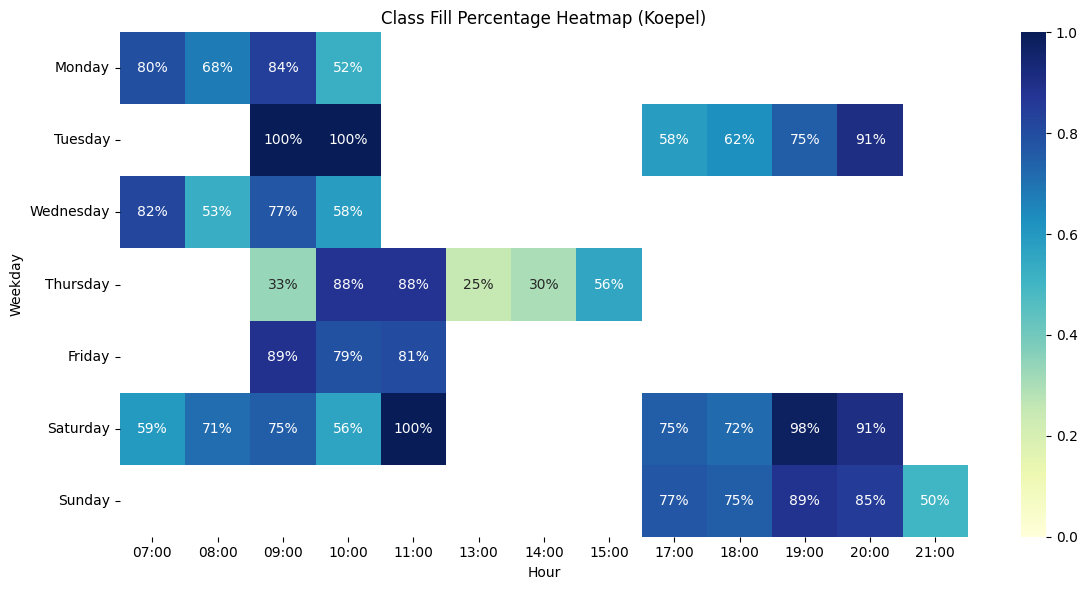

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fill_percentage_heatmap(df, title):
    # Remove entries with missing required values
    df = df.dropna(subset=['date', 'time', 'capacity'])

    # Parse date and extract weekday
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['weekday'] = df['date'].dt.day_name()

    # Extract hour from 'time' (before the ' - ')
    df['hour'] = df['time'].str.split(' - ').str[0]

    # Convert capacity string "x / y" to numeric
    df[['available', 'total']] = df['capacity'].str.split('/', expand=True)
    df['available'] = pd.to_numeric(df['available'].str.strip(), errors='coerce')
    df['total'] = pd.to_numeric(df['total'].str.strip(), errors='coerce')
    df['fill_percentage'] = (df['available'] / df['total']).round(2)

    # Remove 0% and NaN fill percentages
    df = df[df['fill_percentage'] > 0]

    # Group by weekday and hour, take average fill %
    pivot = df.groupby(['weekday', 'hour'])['fill_percentage'].mean().reset_index()

    # Pivot to heatmap format
    heatmap_data = pivot.pivot(index='weekday', columns='hour', values='fill_percentage')

    # Set weekday order
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex(weekday_order)

    # Sort hours chronologically
    heatmap_data = heatmap_data[sorted(heatmap_data.columns)]

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="YlGnBu", vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel('Hour')
    plt.ylabel('Weekday')
    plt.tight_layout()
    plt.show()
    
plot_fill_percentage_heatmap(koepel_df_latest, "Class Fill Percentage Heatmap (Koepel)")


In [249]:
print("koepel_df_latest.head():")
koepel_df_latest.head()


koepel_df_latest.head():


,description,date,time,capacity,instructor,file_name,scrape_datetime
0,Samen zullen we met behulp van een reformer in...,1900-05-06,19:00 - 19:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
1,Samen zullen we met behulp van een reformer in...,1900-05-06,20:00 - 20:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
2,Samen zullen we met behulp van een reformer in...,1900-05-10,15:00 - 15:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
3,Samen zullen we met behulp van een reformer in...,1900-05-10,11:00 - 11:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
4,,1900-05-10,13:00 - 13:45,1 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23


In [250]:
print("\nrite_df_latest.head():")
rite_df_latest.head()


rite_df_latest.head():


,name,date,hour,address,instructor,availability,file_name,scrape_datetime
0,REFORM - GHENT SOUTH,2025-05-10,12:00 - 12:50,Zuidstationstraat 18,Maike T.,17 / 17,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
1,REFORM - ANTWERP,2025-05-10,13:00 - 13:50,"Riemstraat 13, Antwerp",Sophie V.B.,19 / 19,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
2,REFORM - BRASSCHAAT,2025-05-10,13:00 - 13:50,Bredabaan 259,Lieke H.,18 / 20,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
3,REFORM - GHENT SOUTH,2025-05-10,13:00 - 13:50,Zuidstationstraat 18,Maike T.,16 / 17,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
4,REFORM - ANTWERP,2025-05-10,14:00 - 14:50,"Riemstraat 13, Antwerp",Sophie V.B.,19 / 19,rite_schedule_20250509_162319.json,2025-05-09 16:23:19


In [251]:
print("\ncoolcharm_df_latest.head():")
coolcharm_df_latest.head()


coolcharm_df_latest.head():


,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status
0,2025-05-10,10:00 - 10:55,Tower mixed level (All levels),Genk,4 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
1,2025-05-10,11:00 - 11:55,Reformer Mixed Level (All levels),Genk,0 / 5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
2,2025-05-10,NaN,NaN,NaN,NaN,Book,Mat + Tower (All Levels),11:00 - 11:50,Antwerp,Lana,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
3,2025-05-11,09:00 - 09:55,Tower mixed level (All levels),Genk,1 / 6,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250510_180237.json,2025-05-10 18:02:37,NaN,NaN
4,2025-05-11,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,5 / 5,Full,NaN,NaN,NaN,NaN,coolcharm_schedule_20250510_180237.json,2025-05-10 18:02:37,NaN,NaN


In [252]:
# Print schemas and examples for all three DataFrames (using the full DataFrames, not just the _latest)

print("koepel_df schema:")
print(koepel_df.dtypes)
print("\nkoepel_df example rows:")
print(koepel_df.head(3))
print("\n" + "="*60 + "\n")

print("rite_df schema:")
print(rite_df.dtypes)
print("\nrite_df example rows:")
print(rite_df.head(3))
print("\n" + "="*60 + "\n")

print("coolcharm_df schema:")
print(coolcharm_df.dtypes)
print("\ncoolcharm_df example rows:")
print(coolcharm_df.head(3))


koepel_df schema:
description                object
date                       object
time                       object
capacity                   object
instructor                 object
file_name                  object
scrape_datetime    datetime64[ns]
dtype: object

koepel_df example rows:
                                          description              date  \
0   Samen zullen we met behulp van een reformer in...    maandag 05 mei   
73  Samen zullen we met behulp van een reformer in...    vrijdag 23 mei   
72  Samen zullen we met behulp van een reformer in...  donderdag 22 mei   

             time capacity            instructor  \
0   07:00 - 07:45    1 / 4  Gilltumn Vanhauwaert   
73  07:00 - 07:45    2 / 4  Gilltumn Vanhauwaert   
72  20:00 - 20:45    2 / 4  Gilltumn Vanhauwaert   

                               file_name     scrape_datetime  
0   koepel_schedule_20250509_220523.json 2025-05-09 22:05:23  
73  koepel_schedule_20250509_220523.json 2025-05-09 22:05:23  
72  ko

In [253]:
import pandas as pd

def check_class_data_quality(latest_df, original_df, date, time, source):
    """
    Compare all records for a class (date + time) in the original and latest DataFrames.
    Prints and returns a summary of differences.
    """
    # Define column names for each source
    if source == "koepel":
        # latest: date is datetime, time is object; original: date is string, time is object
        date_col_latest, time_col_latest = "date", "time"
        date_col_orig, time_col_orig = "date", "time"
        # Convert date to string for original, datetime for latest
        if isinstance(date, str):
            date_latest = pd.to_datetime(date).date()
        else:
            date_latest = pd.to_datetime(date).date()
        # For original, date is string like "maandag 05 mei"
        # We'll match on time only, or you can parse the string to date if needed
        # For now, let's match on time only for koepel original
        latest_mask = (latest_df[date_col_latest].dt.date == date_latest) & (latest_df[time_col_latest] == time)
        orig_mask = (original_df[time_col_orig] == time)
    elif source == "rite":
        date_col_latest, time_col_latest = "date", "hour"
        date_col_orig, time_col_orig = "date", "hour"
        date_latest = pd.to_datetime(date).date()
        latest_mask = (latest_df[date_col_latest].dt.date == date_latest) & (latest_df[time_col_latest] == time)
        orig_mask = (original_df[date_col_orig].dt.date == date_latest) & (original_df[time_col_orig] == time)
    elif source == "coolcharm":
        date_col_latest, time_col_latest = "date", "time"
        date_col_orig, time_col_orig = "date", "time"
        date_latest = pd.to_datetime(date).date()
        latest_mask = (latest_df[date_col_latest].dt.date == date_latest) & (latest_df[time_col_latest] == time)
        orig_mask = (original_df[date_col_orig].dt.date == date_latest) & (original_df[time_col_orig] == time)
    else:
        raise ValueError("Unknown source")

    # Filter records
    latest_records = latest_df[latest_mask]
    orig_records = original_df[orig_mask]

    # Compare
    summary = {
        "source": source,
        "date": date,
        "time": time,
        "latest_count": len(latest_records),
        "original_count": len(orig_records),
        "differences": []
    }

    # Compare row-by-row if counts match
    if len(latest_records) == len(orig_records) and len(latest_records) > 0:
        # Reset index for comparison
        latest_records = latest_records.reset_index(drop=True)
        orig_records = orig_records.reset_index(drop=True)
        for i in range(len(latest_records)):
            latest_row = latest_records.iloc[i]
            orig_row = orig_records.iloc[i]
            row_diff = {}
            for col in set(latest_records.columns).intersection(orig_records.columns):
                if pd.isnull(latest_row[col]) and pd.isnull(orig_row[col]):
                    continue
                if str(latest_row[col]) != str(orig_row[col]):
                    row_diff[col] = {"latest": latest_row[col], "original": orig_row[col]}
            if row_diff:
                summary["differences"].append({"row": i, "diff": row_diff})
    else:
        summary["differences"].append("Row count mismatch or no records found.")

    print(f"Data quality check for {source} on {date} {time}:")
    print(f"Latest count: {summary['latest_count']}, Original count: {summary['original_count']}")
    if summary["differences"]:
        print("Differences found:")
        for diff in summary["differences"]:
            print(diff)
    else:
        print("No differences found.")

    return summary

In [254]:
koepel_df_latest

,description,date,time,capacity,instructor,file_name,scrape_datetime
0,Samen zullen we met behulp van een reformer in...,1900-05-06,19:00 - 19:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
1,Samen zullen we met behulp van een reformer in...,1900-05-06,20:00 - 20:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
2,Samen zullen we met behulp van een reformer in...,1900-05-10,15:00 - 15:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
3,Samen zullen we met behulp van een reformer in...,1900-05-10,11:00 - 11:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
4,,1900-05-10,13:00 - 13:45,1 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
...,...,...,...,...,...,...,...
324,NaN,1900-06-25,10:00 - 10:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
325,NaN,1900-06-25,09:00 - 09:45,2 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
326,NaN,1900-06-24,18:00 - 18:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
327,NaN,NaT,,,,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38


In [255]:
# Ensure 'date' columns are datetime before calling check_class_data_quality
if not pd.api.types.is_datetime64_any_dtype(rite_df_latest['date']):
    rite_df_latest['date'] = pd.to_datetime(rite_df_latest['date'], errors='coerce')
if not pd.api.types.is_datetime64_any_dtype(rite_df['date']):
    rite_df['date'] = pd.to_datetime(rite_df['date'], errors='coerce')

check_class_data_quality(rite_df_latest, rite_df, "2025-05-09", "16:30 - 17:20", "rite")

Data quality check for rite on 2025-05-09 16:30 - 17:20:
Latest count: 3, Original count: 12
Differences found:
Row count mismatch or no records found.


{'source': 'rite',
 'date': '2025-05-09',
 'time': '16:30 - 17:20',
 'latest_count': 3,
 'original_count': 12,
 'differences': ['Row count mismatch or no records found.']}

In [256]:
rite_df_latest[(rite_df_latest['date'] == "2025-01-06") & (rite_df_latest['hour'] == "08:00 - 08:50")]


,name,date,hour,address,instructor,availability,file_name,scrape_datetime


In [257]:
rite_df[
    (rite_df['date'] == "2025-01-06") &
    (rite_df['hour'] == "08:00 - 08:50") &
    (rite_df['instructor'] == "Lara D.W.")
]


,name,date,hour,address,instructor,availability,file_name,scrape_datetime


In [258]:
# Show duplicate combinations of name, date, and hour in rite_df
duplicates = rite_df[rite_df.duplicated(subset=['name', 'date', 'hour'], keep=False)]
if not duplicates.empty:
    print("Duplicate combinations of name, date, and hour found in rite_df:")
    display(duplicates.sort_values(['name', 'date', 'hour']))
else:
    print("No duplicate combinations of name, date, and hour found in rite_df.")


Duplicate combinations of name, date, and hour found in rite_df:


,name,date,hour,address,instructor,availability,file_name,scrape_datetime
0,REFORM - ANTWERP,2025-05-09,16:30 - 17:20,"Riemstraat 13, Antwerp",Nienke D.B.,19 / 19,rite_schedule_20250509_160428.json,2025-05-09 16:04:28
182,REFORM - ANTWERP,2025-05-09,16:30 - 17:20,"Riemstraat 13, Antwerp",Nienke D.B.,19 / 19,rite_schedule_20250509_161253.json,2025-05-09 16:12:53
364,REFORM - ANTWERP,2025-05-09,16:30 - 17:20,"Riemstraat 13, Antwerp",Nienke D.B.,19 / 19,rite_schedule_20250509_161428.json,2025-05-09 16:14:28
546,REFORM - ANTWERP,2025-05-09,16:30 - 17:20,"Riemstraat 13, Antwerp",Nienke D.B.,19 / 19,rite_schedule_20250509_162319.json,2025-05-09 16:23:19
3,REFORM - ANTWERP,2025-05-09,17:30 - 18:20,"Riemstraat 13, Antwerp",Nienke D.B.,19 / 19,rite_schedule_20250509_160428.json,2025-05-09 16:04:28
...,...,...,...,...,...,...,...,...
20329,RITE x CLAW | REFORM & BRUNCH,2025-06-14,11:00 - 11:50,Zuidstationstraat 18,Maike T.,16 / 17,rite_schedule_20250612_160627.json,2025-06-12 16:06:27
20501,RITE x CLAW | REFORM & BRUNCH,2025-06-14,11:00 - 11:50,Zuidstationstraat 18,Maike T.,15 / 17,rite_schedule_20250613_041118.json,2025-06-13 04:11:18
20688,RITE x CLAW | REFORM & BRUNCH,2025-06-14,11:00 - 11:50,Zuidstationstraat 18,Maike T.,15 / 17,rite_schedule_20250613_101152.json,2025-06-13 10:11:52
20866,RITE x CLAW | REFORM & BRUNCH,2025-06-14,11:00 - 11:50,Zuidstationstraat 18,Maike T.,15 / 17,rite_schedule_20250613_160515.json,2025-06-13 16:05:15


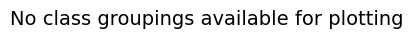

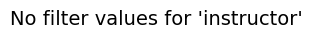

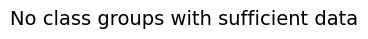

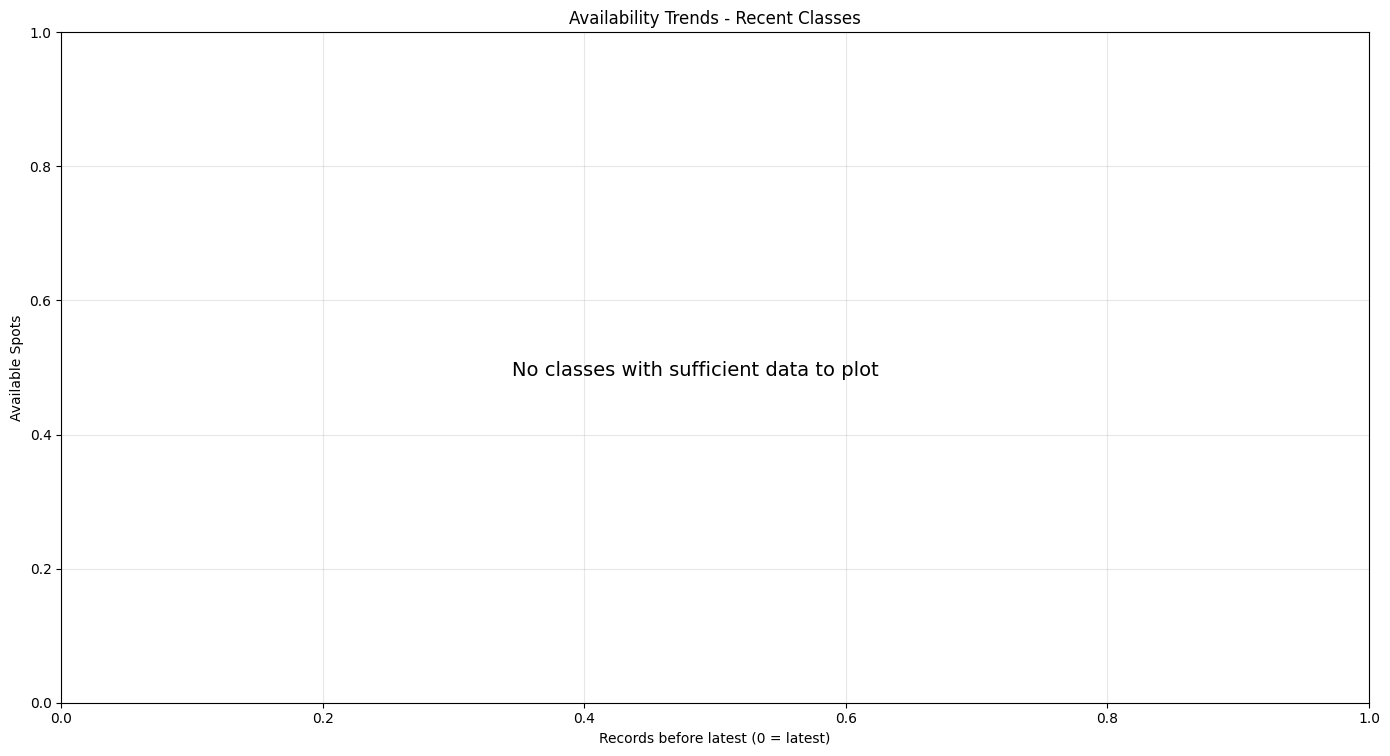

In [326]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ensure 'available' column exists by extracting the first 2 digits of 'availability'
if 'available' not in coolcharm_df.columns:
    # Extract the first 2 digits (allowing for single-digit numbers as well)
    coolcharm_df['available'] = coolcharm_df['availability'].str.extract(r'(\d{1,2})').astype(float)

# OPTION 1: Faceted/Subplot Approach - Shows each class separately
def create_faceted_plot(coolcharm_df, max_points=10, max_classes=12):
    """Create subplots for individual classes, with error handling for empty data."""
    import matplotlib.ticker as mticker
    group_cols = ['date', 'hour', 'instructor']
    
    # Get the classes with most data points
    if coolcharm_df.empty:
        print("Warning: DataFrame is empty. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No data available for plotting", y=0.5, fontsize=14)
        return fig

    class_counts = coolcharm_df.groupby(group_cols).size().sort_values(ascending=False)
    if class_counts.empty:
        print("Warning: No class groupings found. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No class groupings available for plotting", y=0.5, fontsize=14)
        return fig

    top_classes = class_counts.head(max_classes).index

    # Calculate subplot grid
    n_classes = len(top_classes)
    if n_classes == 0:
        print("Warning: No classes to plot. No subplots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No classes available for plotting", y=0.5, fontsize=14)
        return fig

    cols = 3
    rows = (n_classes + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    axes = axes.flatten() if n_classes > 1 else [axes]

    plotted_any = False
    for i, key in enumerate(top_classes):
        group = coolcharm_df[
            (coolcharm_df['date'] == key[0]) & 
            (coolcharm_df['hour'] == key[1]) & 
            (coolcharm_df['instructor'] == key[2])
        ].sort_values('scrape_datetime')
        
        last_n = group.tail(max_points)
        if len(last_n) < 2:
            axes[i].set_visible(False)
            continue

        plotted_any = True
        x = np.arange(-len(last_n)+1, 1)
        y = last_n['available'].values

        axes[i].plot(x, y, marker='o', linewidth=2, markersize=6)
        # Defensive: handle if key[0] is not datetime
        date_str = key[0].strftime('%m/%d') if hasattr(key[0], 'strftime') else str(key[0])
        axes[i].set_title(f"{date_str} {key[1]} - {key[2]}", fontsize=10)
        axes[i].set_xlabel("Records before latest")
        axes[i].set_ylabel("Available")
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xticks(range(-max_points+1, 1, 2))
        axes[i].set_ylim(bottom=0)  # Always start y axis at 0
        axes[i].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Int y labels

    # Hide unused subplots
    for i in range(len(top_classes), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    if plotted_any:
        plt.suptitle("Availability Trends by Class", y=1.02, fontsize=14)
    else:
        plt.suptitle("No classes with sufficient data to plot", y=0.5, fontsize=14)
    return fig

# OPTION 2: Filter by specific criteria (instructor, time, etc.)
def create_filtered_plot(coolcharm_df, filter_by='instructor', filter_values=None, max_points=10):
    """Show trends filtered by specific criteria, with error handling for empty data."""
    group_cols = ['date', 'hour', 'instructor']

    if coolcharm_df.empty:
        print("Warning: DataFrame is empty. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No data available for plotting", y=0.5, fontsize=14)
        return fig

    if filter_values is None:
        # Get top 5-8 most common values for the filter
        if filter_by == 'instructor':
            filter_values = coolcharm_df['instructor'].value_counts().head(6).index.tolist()
        elif filter_by == 'hour':
            filter_values = sorted(coolcharm_df['hour'].value_counts().head(6).index.tolist())
        elif filter_by == 'date':
            filter_values = coolcharm_df['date'].value_counts().head(6).index.tolist()
        else:
            filter_values = []

    if not filter_values:
        print(f"Warning: No filter values found for '{filter_by}'. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle(f"No filter values for '{filter_by}'", y=0.5, fontsize=14)
        return fig

    plt.figure(figsize=(14, 8))
    # Use a default colormap from matplotlib
    colors = plt.cm.Set3(np.linspace(0, 1, len(filter_values)))

    plotted_any = False
    for i, filter_val in enumerate(filter_values):
        filtered_df = coolcharm_df[coolcharm_df[filter_by] == filter_val]
        if filtered_df.empty:
            continue

        for j, (key, group) in enumerate(filtered_df.groupby(group_cols)):
            group = group.sort_values('scrape_datetime')
            last_n = group.tail(max_points)

            if len(last_n) < 2:
                continue

            plotted_any = True
            x = np.arange(-len(last_n)+1, 1)
            y = last_n['available'].values

            # Use same color for same filter value, but vary alpha/style
            label = f"{filter_by}: {filter_val}" if j == 0 else None
            plt.plot(x, y, marker='o', alpha=0.7, color=colors[i], label=label)

    plt.title(f"Availability Trends by {filter_by.title()}")
    plt.xlabel("Records before latest (0 = latest)")
    plt.ylabel("Available Spots")
    if plotted_any:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.suptitle("No classes with sufficient data to plot", y=0.5, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

# OPTION 3: Statistical summary approach
def create_summary_plot(coolcharm_df, max_points=10):
    """Show statistical trends rather than individual lines, with error handling for empty data."""
    group_cols = ['date', 'hour', 'instructor']

    if coolcharm_df.empty:
        print("Warning: DataFrame is empty. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No data available for plotting", y=0.5, fontsize=14)
        return fig

    # Collect all trend data
    all_trends = []

    for key, group in coolcharm_df.groupby(group_cols):
        group = group.sort_values('scrape_datetime')
        last_n = group.tail(max_points)

        if len(last_n) < 2:
            continue

        # Normalize to percentage of capacity
        if 'total' in coolcharm_df.columns:
            trend = (last_n['available'] / last_n['total'] * 100).values
        else:
            trend = last_n['available'].values

        all_trends.append(trend)

    if not all_trends:
        print("Warning: No class groups with sufficient data for summary plot.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No class groups with sufficient data", y=0.5, fontsize=14)
        return fig

    # Pad trends to same length and compute statistics
    max_len = max(len(t) for t in all_trends)
    padded_trends = []

    for trend in all_trends:
        if len(trend) < max_len:
            # Pad with the first value
            padded = np.concatenate([np.full(max_len - len(trend), trend[0]), trend])
        else:
            padded = trend
        padded_trends.append(padded)

    trends_array = np.array(padded_trends)
    x = np.arange(-max_len+1, 1)

    plt.figure(figsize=(12, 8))

    # Plot individual trends as thin lines
    for trend in trends_array:
        plt.plot(x, trend, alpha=0.1, color='gray', linewidth=0.5)

    # Plot statistical summaries
    mean_trend = np.mean(trends_array, axis=0)
    q25 = np.percentile(trends_array, 25, axis=0)
    q75 = np.percentile(trends_array, 75, axis=0)

    plt.fill_between(x, q25, q75, alpha=0.3, label='25th-75th percentile', color='blue')
    plt.plot(x, mean_trend, linewidth=3, label='Mean trend', color='red')

    plt.title("Class Availability Trends - Statistical Summary")
    plt.xlabel("Records before latest (0 = latest)")
    plt.ylabel("Available Spots (% of capacity)" if 'total' in coolcharm_df.columns else "Available Spots")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

# OPTION 4: Interactive filtering approach (if using Jupyter)
def create_time_based_plot(coolcharm_df, max_points=10, time_window='recent'):
    """Focus on specific time periods, with error handling for empty data."""
    group_cols = ['date', 'hour', 'instructor']

    if coolcharm_df.empty:
        print("Warning: DataFrame is empty. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle("No data available for plotting", y=0.5, fontsize=14)
        return fig

    if time_window == 'recent':
        # Only show classes from last few days
        if coolcharm_df['date'].dtype.kind in 'M':  # datetime
            recent_date = coolcharm_df['date'].max() - pd.Timedelta(days=3)
        else:
            # Try to convert to datetime
            try:
                recent_date = pd.to_datetime(coolcharm_df['date']).max() - pd.Timedelta(days=3)
            except Exception:
                recent_date = None
        if recent_date is not None:
            filtered_df = coolcharm_df[coolcharm_df['date'] >= recent_date]
        else:
            filtered_df = coolcharm_df
    elif time_window == 'popular':
        # Only show most popular class times
        popular_times = coolcharm_df.groupby('hour').size().nlargest(4).index
        filtered_df = coolcharm_df[coolcharm_df['hour'].isin(popular_times)]
    else:
        filtered_df = coolcharm_df

    if filtered_df.empty:
        print(f"Warning: No data after filtering for '{time_window}'. No plots will be created.")
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.set_visible(False)
        plt.suptitle(f"No data for '{time_window}' classes", y=0.5, fontsize=14)
        return fig

    plt.figure(figsize=(14, 8))

    # Use distinct colors and markers
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

    plot_count = 0
    plotted_any = False
    for key, group in filtered_df.groupby(group_cols):
        group = group.sort_values('scrape_datetime')
        last_n = group.tail(max_points)

        if len(last_n) < 2:
            continue

        plotted_any = True
        x = np.arange(-len(last_n)+1, 1)
        y = last_n['available'].values

        color = colors[plot_count % len(colors)]
        marker = markers[plot_count % len(markers)]

        # Defensive: handle if key[0] is not datetime
        date_str = key[0].strftime('%m/%d') if hasattr(key[0], 'strftime') else str(key[0])
        label = f"{date_str} {key[1]} - {key[2][:10]}"
        plt.plot(x, y, marker=marker, linewidth=2, markersize=6, 
                color=color, label=label, alpha=0.8)

        plot_count += 1
        if plot_count >= 15:  # Limit number of lines
            break

    plt.title(f"Availability Trends - {time_window.title()} Classes")
    plt.xlabel("Records before latest (0 = latest)")
    plt.ylabel("Available Spots")
    if plotted_any:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    else:
        plt.suptitle("No classes with sufficient data to plot", y=0.5, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

# USAGE EXAMPLES:
fig1 = create_faceted_plot(coolcharm_df)  # Best for detailed view
fig2 = create_filtered_plot(coolcharm_df, filter_by='instructor')  # Best for comparing instructors
fig3 = create_summary_plot(coolcharm_df)  # Best for overall patterns
fig4 = create_time_based_plot(coolcharm_df, time_window='recent')  # Best for recent data


In [259]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Ensure 'available' column exists by extracting the first 2 digits of 'availability'
if 'available' not in rite_df.columns:
    # Extract the first 2 digits (allowing for single-digit numbers as well)
    rite_df['available'] = rite_df['availability'].str.extract(r'(\d{1,2})').astype(float)

# OPTION 1: Faceted/Subplot Approach - Shows each class separately
def create_faceted_plot(rite_df, max_points=10, max_classes=12):
    """Create subplots for individual classes"""
    import matplotlib.ticker as mticker
    group_cols = ['date', 'hour', 'instructor']
    
    # Get the classes with most data points
    class_counts = rite_df.groupby(group_cols).size().sort_values(ascending=False)
    top_classes = class_counts.head(max_classes).index
    
    # Calculate subplot grid
    n_classes = len(top_classes)
    cols = 3
    rows = (n_classes + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
    axes = axes.flatten() if n_classes > 1 else [axes]
    
    for i, key in enumerate(top_classes):
        group = rite_df[
            (rite_df['date'] == key[0]) & 
            (rite_df['hour'] == key[1]) & 
            (rite_df['instructor'] == key[2])
        ].sort_values('scrape_datetime')
        
        last_n = group.tail(max_points)
        if len(last_n) < 2:
            continue
            
        x = np.arange(-len(last_n)+1, 1)
        y = last_n['available'].values
        
        axes[i].plot(x, y, marker='o', linewidth=2, markersize=6)
        axes[i].set_title(f"{key[0].strftime('%m/%d')} {key[1]} - {key[2]}", fontsize=10)
        axes[i].set_xlabel("Records before latest")
        axes[i].set_ylabel("Available")
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xticks(range(-max_points+1, 1, 2))
        axes[i].set_ylim(bottom=0)  # Always start y axis at 0
        axes[i].yaxis.set_major_locator(mticker.MaxNLocator(integer=True))  # Int y labels
    
    # Hide unused subplots
    for i in range(len(top_classes), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle("Availability Trends by Class", y=1.02, fontsize=14)
    return fig

# OPTION 2: Filter by specific criteria (instructor, time, etc.)
def create_filtered_plot(rite_df, filter_by='instructor', filter_values=None, max_points=10):
    """Show trends filtered by specific criteria"""
    group_cols = ['date', 'hour', 'instructor']
    
    if filter_values is None:
        # Get top 5-8 most common values for the filter
        if filter_by == 'instructor':
            filter_values = rite_df['instructor'].value_counts().head(6).index.tolist()
        elif filter_by == 'hour':
            filter_values = sorted(rite_df['hour'].value_counts().head(6).index.tolist())
        elif filter_by == 'date':
            filter_values = rite_df['date'].value_counts().head(6).index.tolist()
    
    plt.figure(figsize=(14, 8))
    # Use a default colormap from matplotlib
    colors = plt.cm.Set3(np.linspace(0, 1, len(filter_values)))
    
    for i, filter_val in enumerate(filter_values):
        filtered_df = rite_df[rite_df[filter_by] == filter_val]
        
        for key, group in filtered_df.groupby(group_cols):
            group = group.sort_values('scrape_datetime')
            last_n = group.tail(max_points)
            
            if len(last_n) < 2:
                continue
                
            x = np.arange(-len(last_n)+1, 1)
            y = last_n['available'].values
            
            # Use same color for same filter value, but vary alpha/style
            plt.plot(x, y, marker='o', alpha=0.7, color=colors[i],
                    label=f"{filter_by}: {filter_val}" if key == list(filtered_df.groupby(group_cols))[0][0] else "")
    
    plt.title(f"Availability Trends by {filter_by.title()}")
    plt.xlabel("Records before latest (0 = latest)")
    plt.ylabel("Available Spots")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

# OPTION 3: Statistical summary approach
def create_summary_plot(rite_df, max_points=10):
    """Show statistical trends rather than individual lines"""
    group_cols = ['date', 'hour', 'instructor']
    
    # Collect all trend data
    all_trends = []
    
    for key, group in rite_df.groupby(group_cols):
        group = group.sort_values('scrape_datetime')
        last_n = group.tail(max_points)
        
        if len(last_n) < 2:
            continue
            
        # Normalize to percentage of capacity
        if 'total' in rite_df.columns:
            trend = (last_n['available'] / last_n['total'] * 100).values
        else:
            trend = last_n['available'].values
            
        all_trends.append(trend)
    
    # Pad trends to same length and compute statistics
    max_len = max(len(t) for t in all_trends)
    padded_trends = []
    
    for trend in all_trends:
        if len(trend) < max_len:
            # Pad with the first value
            padded = np.concatenate([np.full(max_len - len(trend), trend[0]), trend])
        else:
            padded = trend
        padded_trends.append(padded)
    
    trends_array = np.array(padded_trends)
    x = np.arange(-max_len+1, 1)
    
    plt.figure(figsize=(12, 8))
    
    # Plot individual trends as thin lines
    for trend in trends_array:
        plt.plot(x, trend, alpha=0.1, color='gray', linewidth=0.5)
    
    # Plot statistical summaries
    mean_trend = np.mean(trends_array, axis=0)
    q25 = np.percentile(trends_array, 25, axis=0)
    q75 = np.percentile(trends_array, 75, axis=0)
    
    plt.fill_between(x, q25, q75, alpha=0.3, label='25th-75th percentile', color='blue')
    plt.plot(x, mean_trend, linewidth=3, label='Mean trend', color='red')
    
    plt.title("Class Availability Trends - Statistical Summary")
    plt.xlabel("Records before latest (0 = latest)")
    plt.ylabel("Available Spots (% of capacity)" if 'total' in rite_df.columns else "Available Spots")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

# OPTION 4: Interactive filtering approach (if using Jupyter)
def create_time_based_plot(rite_df, max_points=10, time_window='recent'):
    """Focus on specific time periods"""
    group_cols = ['date', 'hour', 'instructor']
    
    if time_window == 'recent':
        # Only show classes from last few days
        recent_date = rite_df['date'].max() - pd.Timedelta(days=3)
        filtered_df = rite_df[rite_df['date'] >= recent_date]
    elif time_window == 'popular':
        # Only show most popular class times
        popular_times = rite_df.groupby('hour').size().nlargest(4).index
        filtered_df = rite_df[rite_df['hour'].isin(popular_times)]
    else:
        filtered_df = rite_df
    
    plt.figure(figsize=(14, 8))
    
    # Use distinct colors and markers
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    plot_count = 0
    for key, group in filtered_df.groupby(group_cols):
        group = group.sort_values('scrape_datetime')
        last_n = group.tail(max_points)
        
        if len(last_n) < 2:
            continue
            
        x = np.arange(-len(last_n)+1, 1)
        y = last_n['available'].values
        
        color = colors[plot_count % len(colors)]
        marker = markers[plot_count % len(markers)]
        
        label = f"{key[0].strftime('%m/%d')} {key[1]} - {key[2][:10]}"
        plt.plot(x, y, marker=marker, linewidth=2, markersize=6, 
                color=color, label=label, alpha=0.8)
        
        plot_count += 1
        if plot_count >= 15:  # Limit number of lines
            break
    
    plt.title(f"Availability Trends - {time_window.title()} Classes")
    plt.xlabel("Records before latest (0 = latest)")
    plt.ylabel("Available Spots")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    return plt.gcf()

# USAGE EXAMPLES:
# fig1 = create_faceted_plot(rite_df)  # Best for detailed view
# fig2 = create_filtered_plot(rite_df, filter_by='instructor')  # Best for comparing instructors
# fig3 = create_summary_plot(rite_df)  # Best for overall patterns
# fig4 = create_time_based_plot(rite_df, time_window='recent')  # Best for recent data

print("Choose one of these options:")
print("1. create_faceted_plot() - Shows each class in separate subplot")
print("2. create_filtered_plot() - Groups by instructor/time/date")
print("3. create_summary_plot() - Shows statistical trends")
print("4. create_time_based_plot() - Focuses on recent or popular classes")

Choose one of these options:
1. create_faceted_plot() - Shows each class in separate subplot
2. create_filtered_plot() - Groups by instructor/time/date
3. create_summary_plot() - Shows statistical trends
4. create_time_based_plot() - Focuses on recent or popular classes


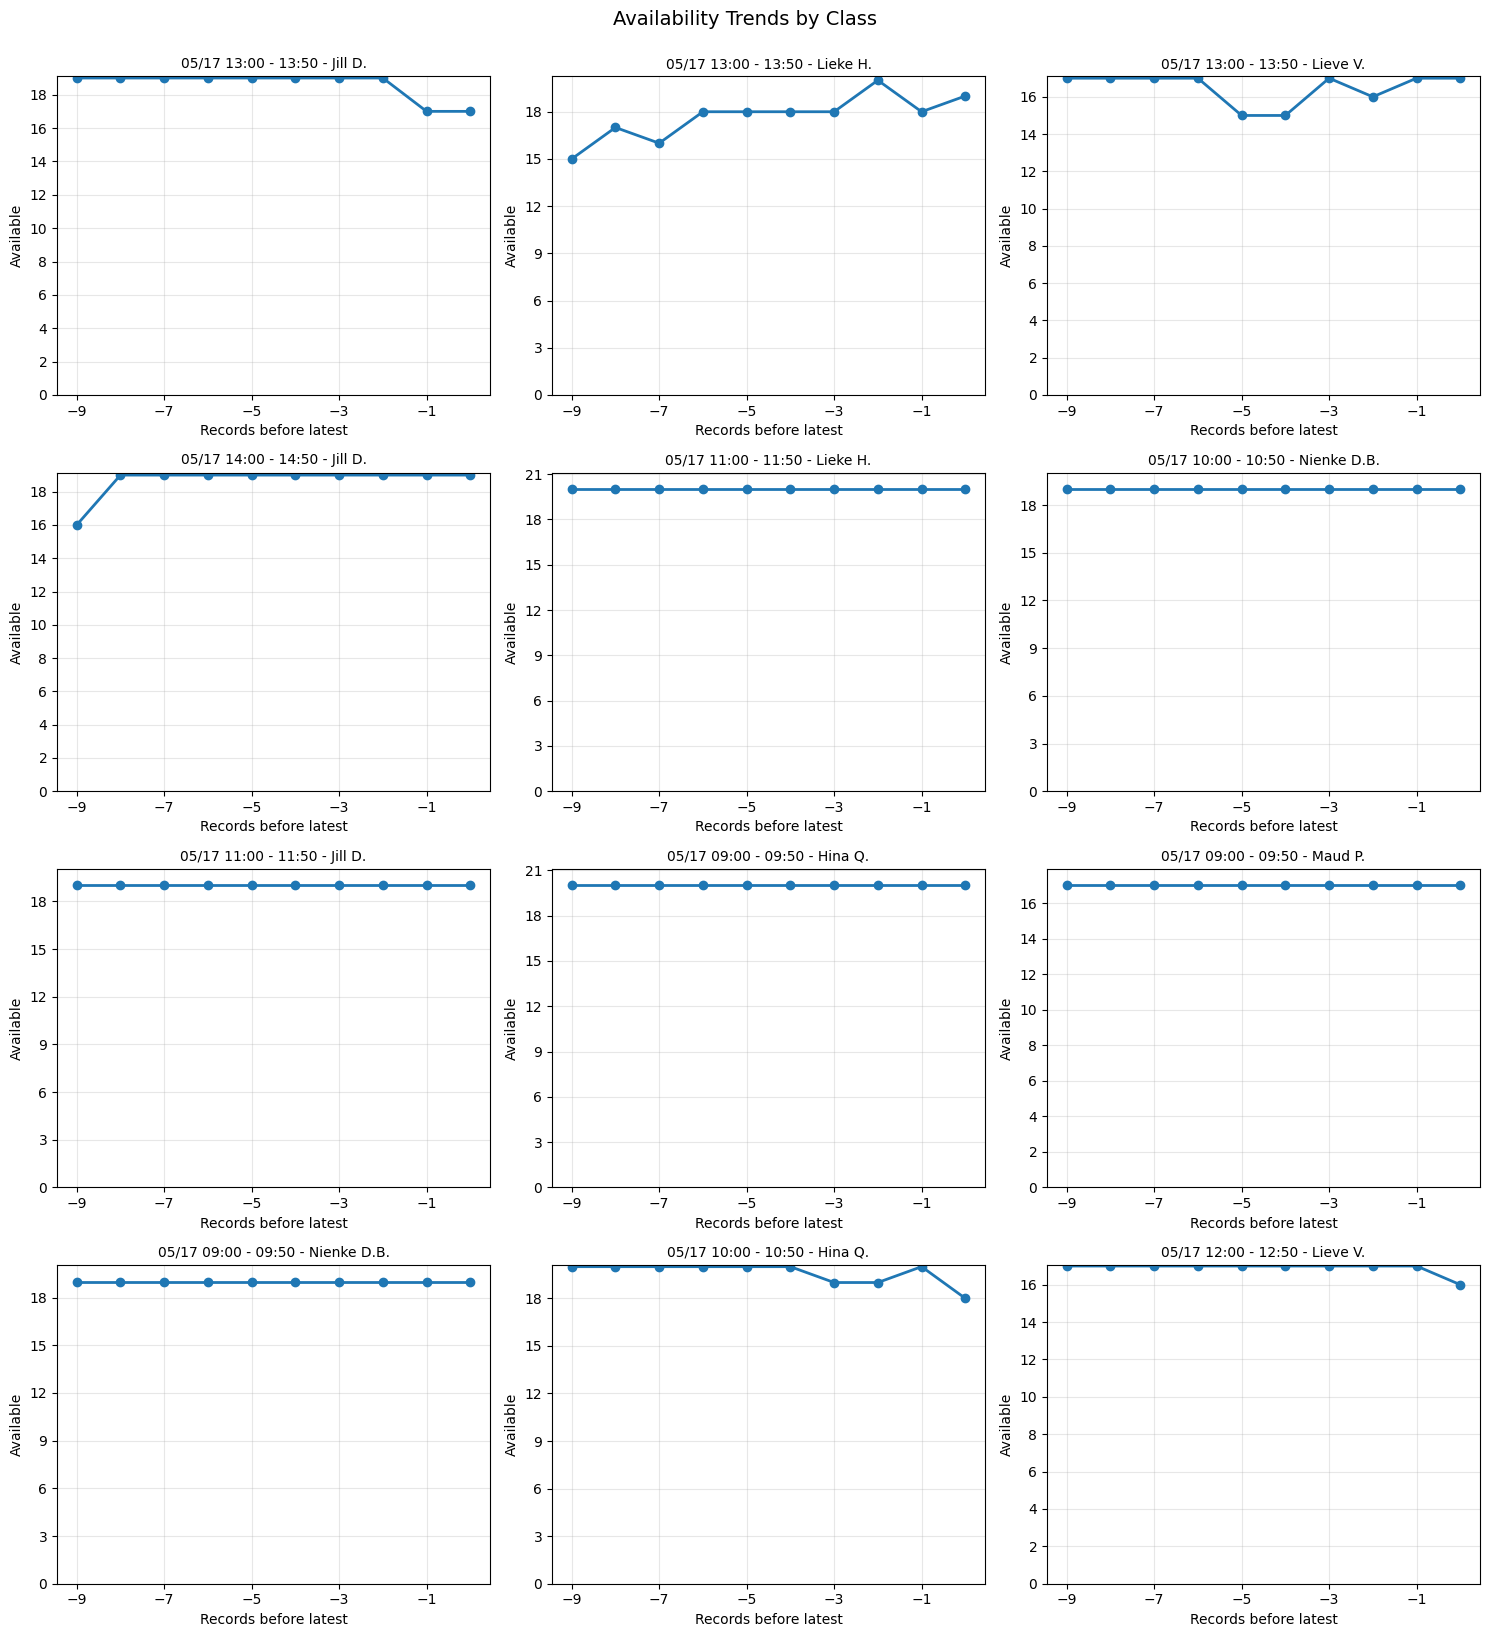

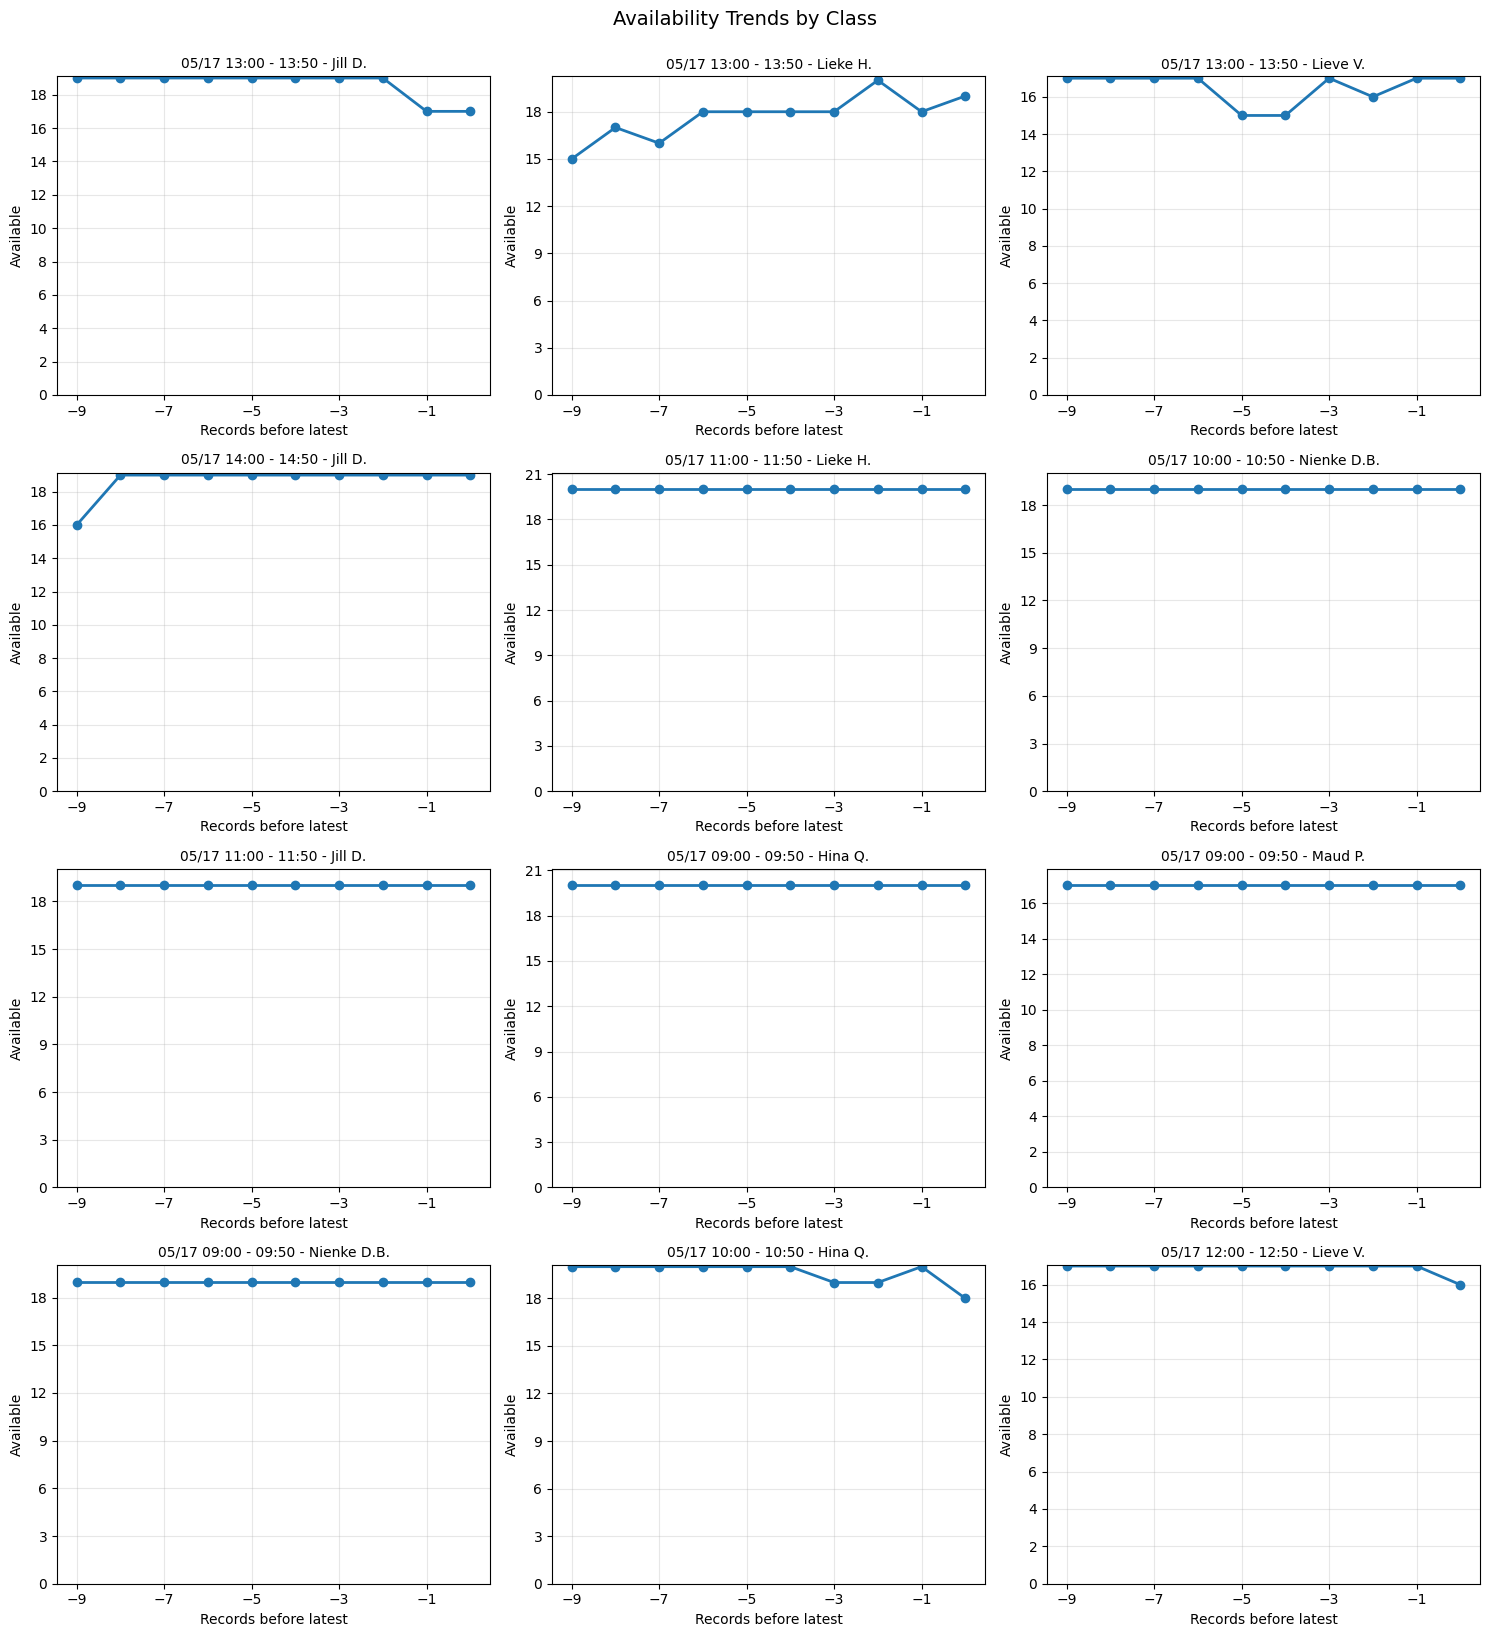

In [260]:
create_faceted_plot(rite_df)

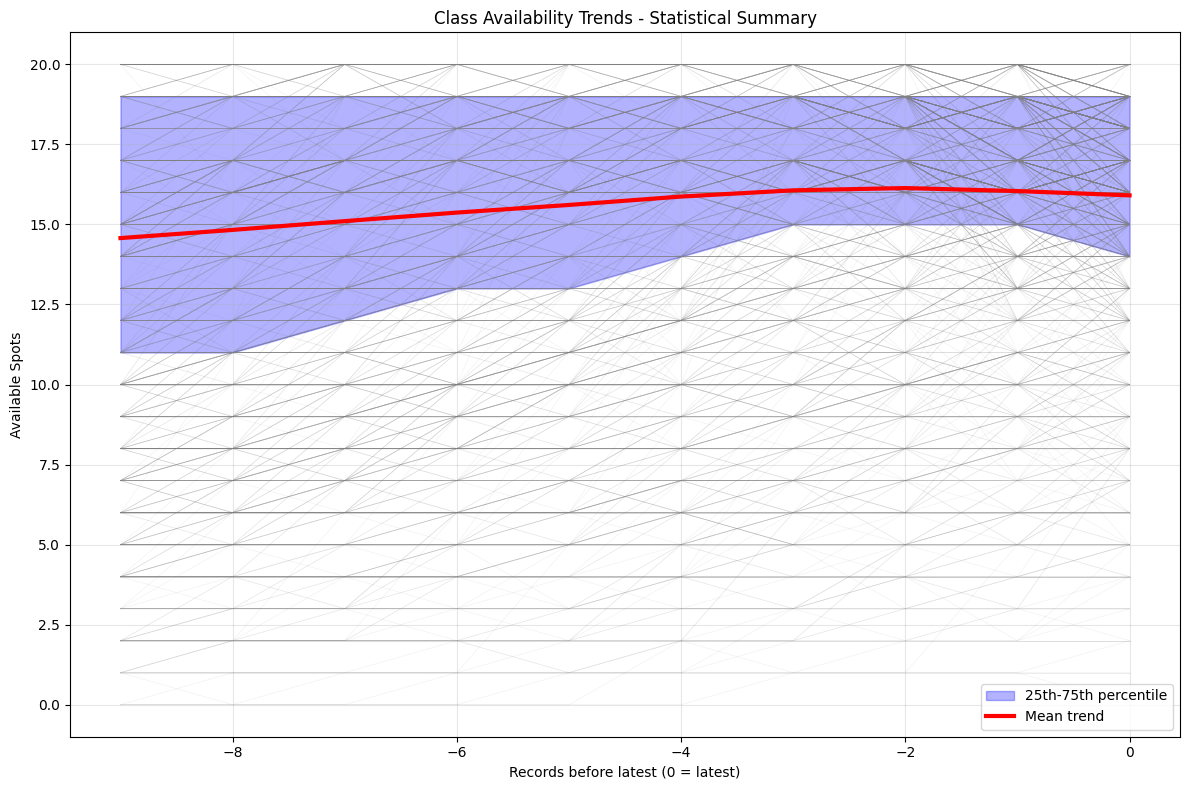

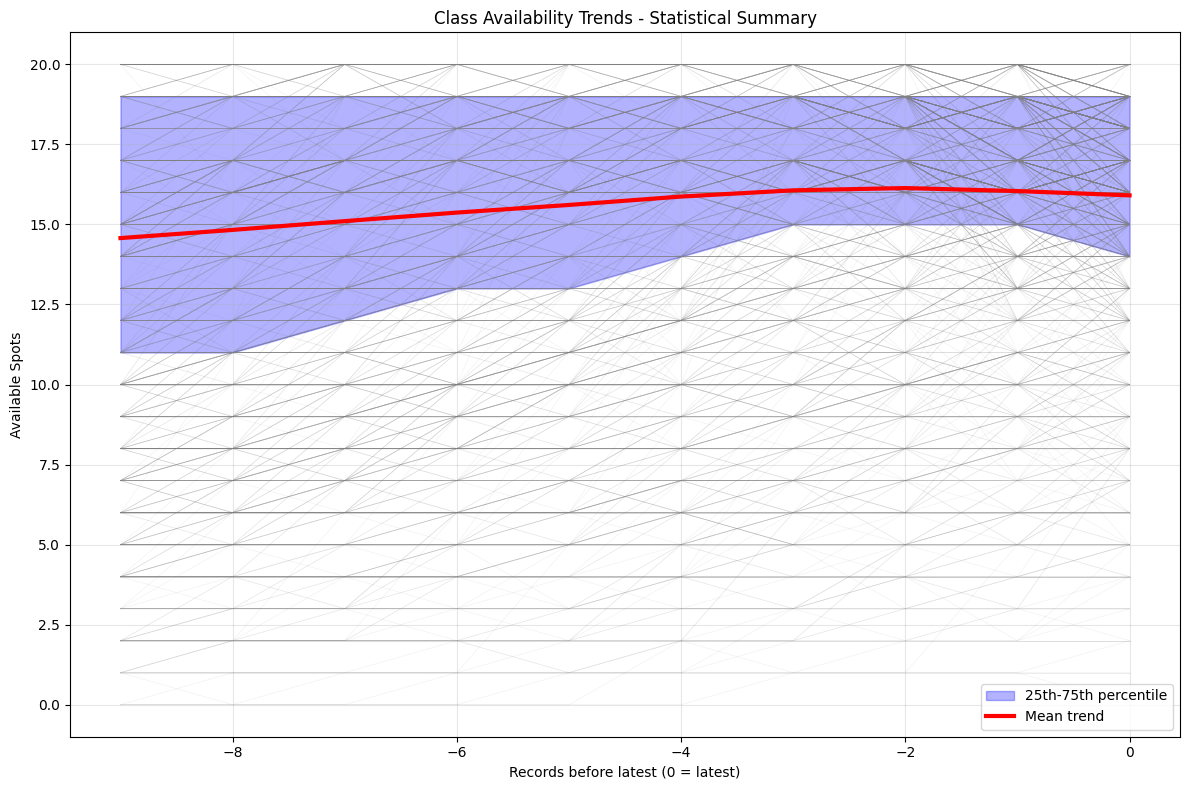

In [261]:
create_summary_plot(rite_df)

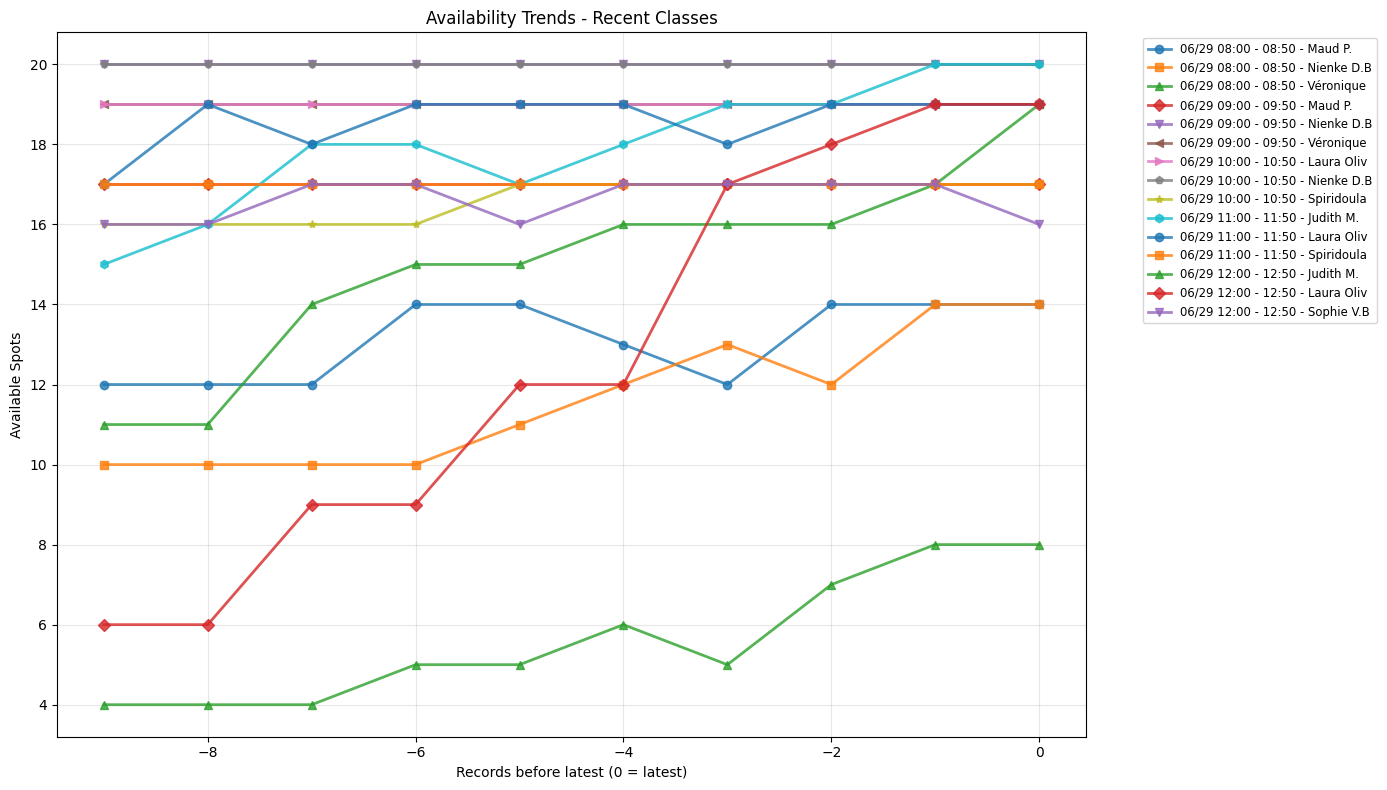

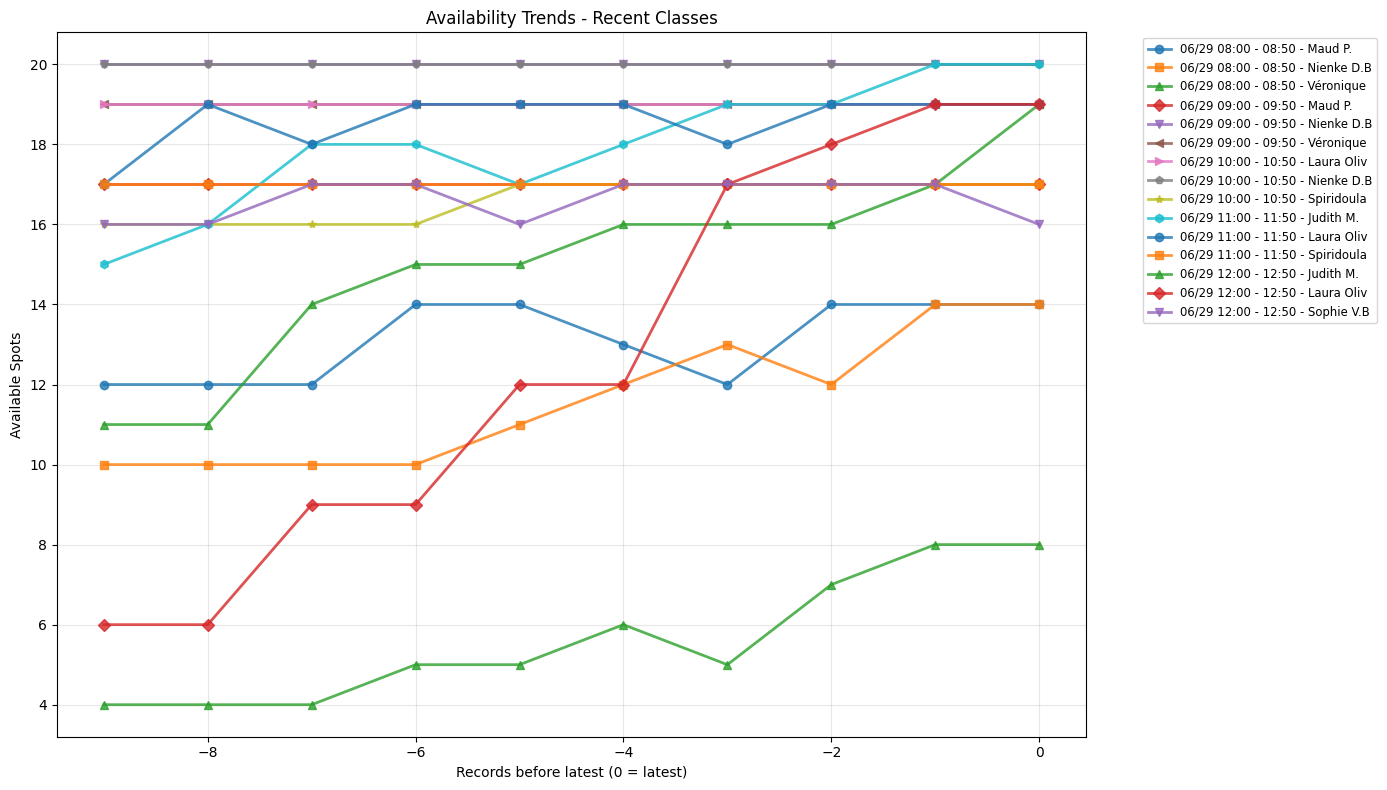

In [262]:
create_time_based_plot(rite_df)

In [263]:
koepel_df_latest['date'] = koepel_df_latest['date'].apply(lambda d: d.replace(year=2025) if pd.notnull(d) else d)
koepel_df_latest

,description,date,time,capacity,instructor,file_name,scrape_datetime
0,Samen zullen we met behulp van een reformer in...,2025-05-06,19:00 - 19:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
1,Samen zullen we met behulp van een reformer in...,2025-05-06,20:00 - 20:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
2,Samen zullen we met behulp van een reformer in...,2025-05-10,15:00 - 15:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
3,Samen zullen we met behulp van een reformer in...,2025-05-10,11:00 - 11:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
4,,2025-05-10,13:00 - 13:45,1 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250509_220523.json,2025-05-09 22:05:23
...,...,...,...,...,...,...,...
324,NaN,2025-06-25,10:00 - 10:45,3 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
325,NaN,2025-06-25,09:00 - 09:45,2 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
326,NaN,2025-06-24,18:00 - 18:45,4 / 4,Gilltumn Vanhauwaert,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38
327,NaN,NaT,,,,koepel_schedule_20250626_101038.json,2025-06-26 10:10:38


In [264]:
koepel_df_latest['capacity'] = koepel_df_latest['capacity'].str.replace(' ', '', regex=False)

In [265]:
coolcharm_df_latest['availability'] = coolcharm_df_latest['availability'].str.replace(' ', '', regex=False)

In [266]:
# Only keep rows where description is not null if date and time is duplicated
dupes = koepel_df_latest.duplicated(subset=['date', 'time'], keep=False)
koepel_df_latest = koepel_df_latest[
    (~dupes) | (dupes & koepel_df_latest['description'].notnull())
]

In [270]:
coolcharm_df_latest = coolcharm_df_latest[coolcharm_df_latest['date'] < '2025-07-01']

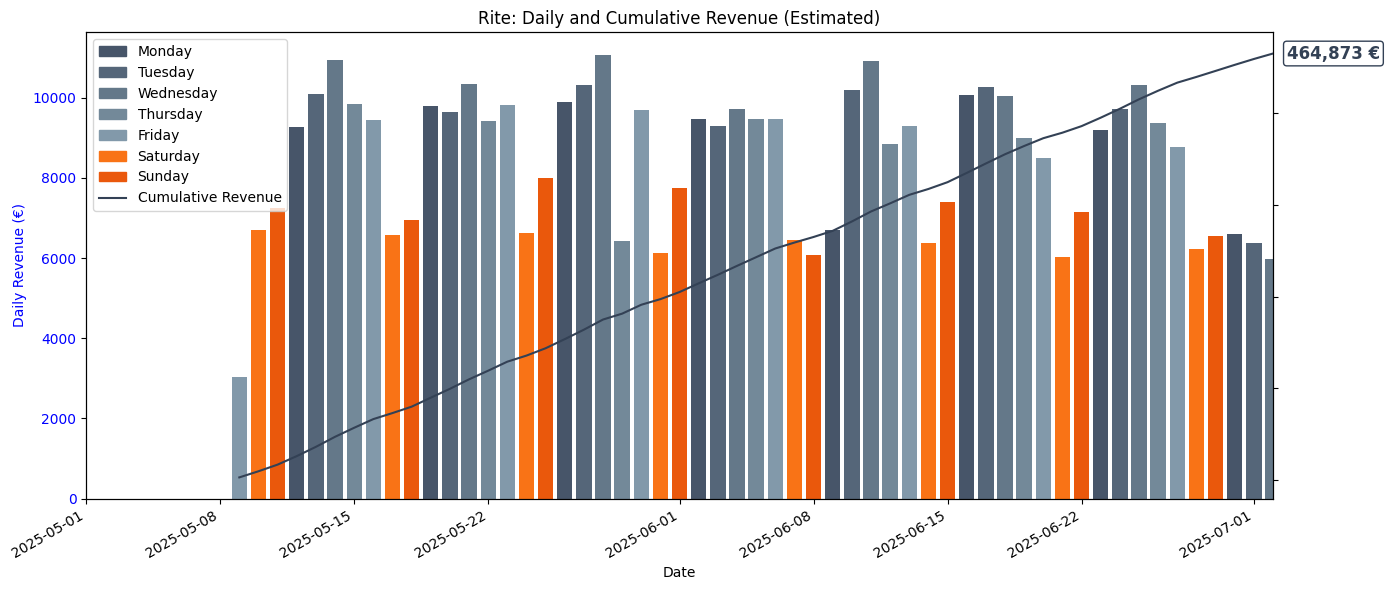

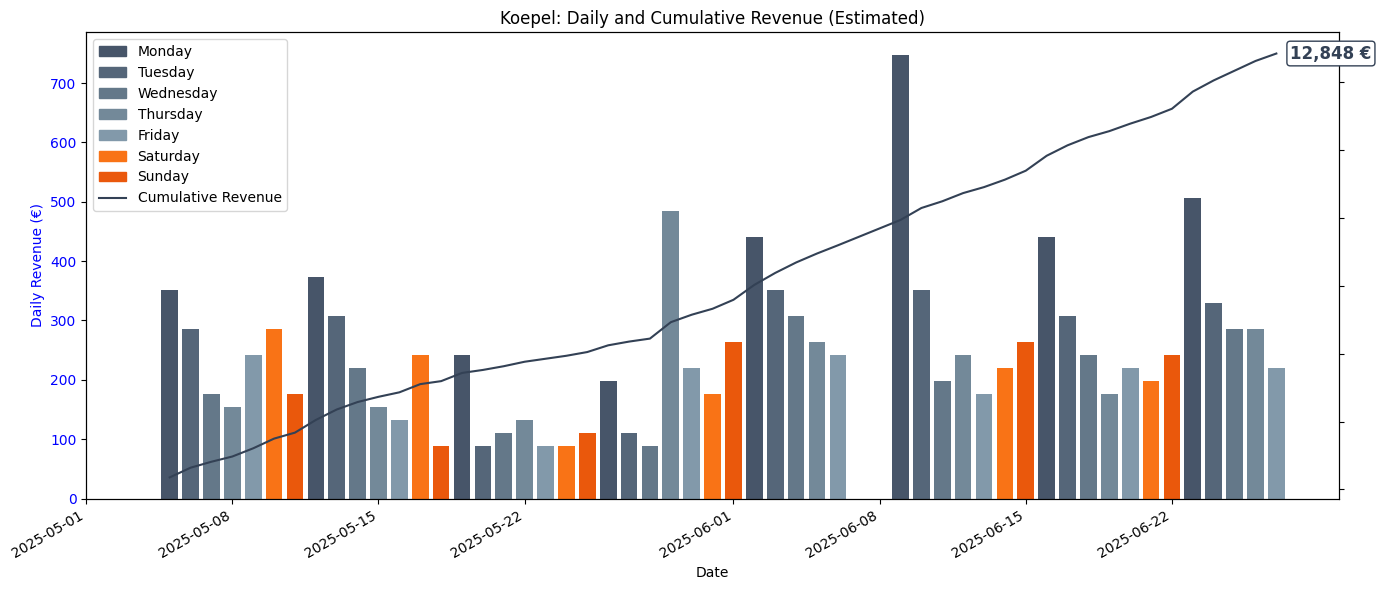

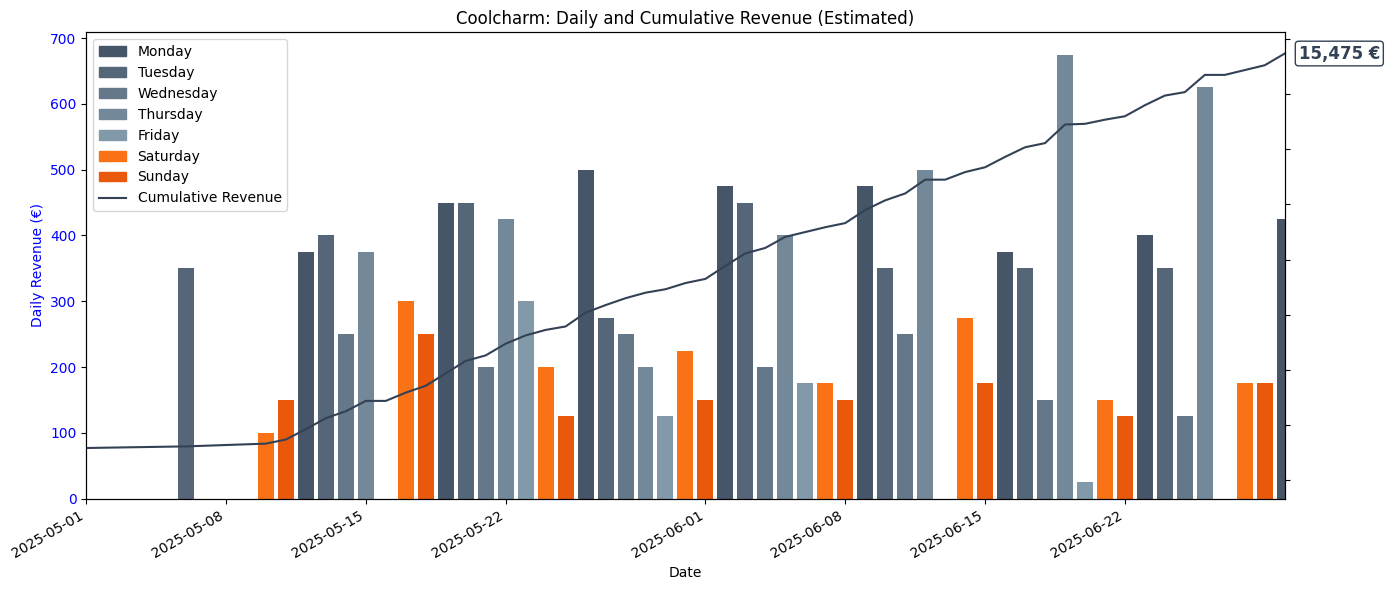

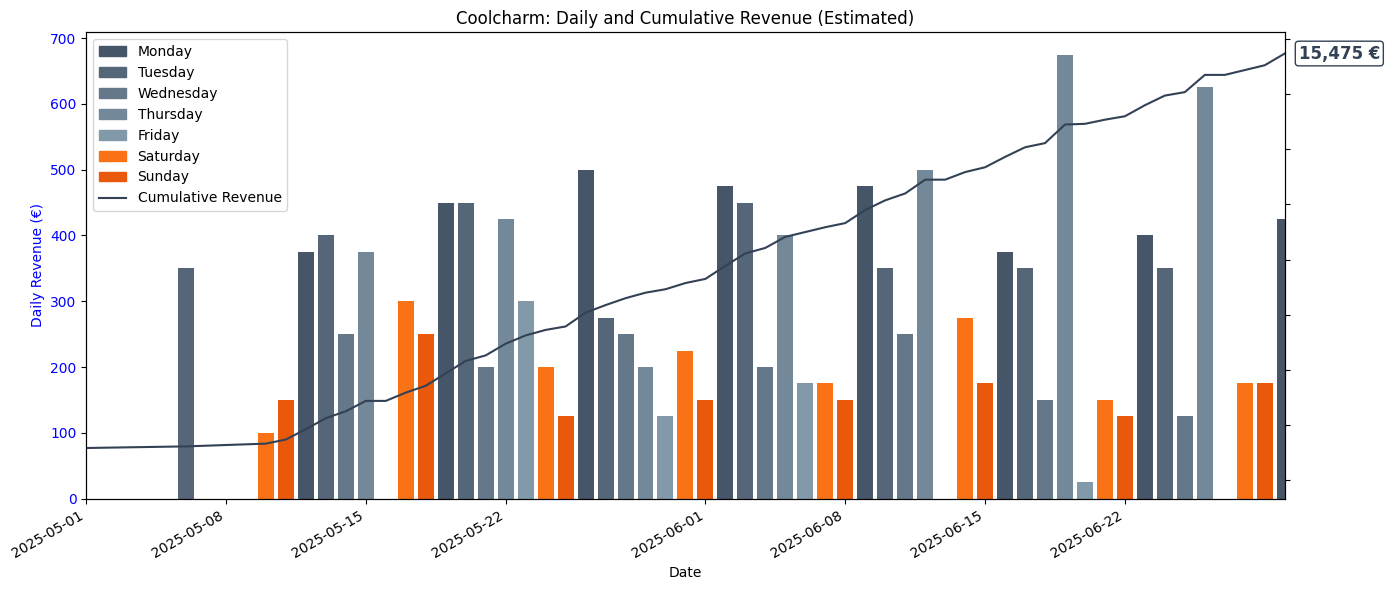

In [284]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_daily_cumulative_revenue(df, price_per_class=19, title_prefix="Rite", date_col='date', avail_col='available', avail_str_col='availability', xlim_extend_days=0):
    """
    Plots daily and cumulative revenue for a given DataFrame.
    - df: DataFrame with at least columns for date, available spots, and availability string.
    - price_per_class: Revenue per available spot.
    - title_prefix: Used in plot title.
    - date_col: Name of the date column.
    - avail_col: Name of the available spots column.
    - avail_str_col: Name of the availability string column (e.g., '17 / 17').
    - xlim_extend_days: Integer, number of days to extend the x-axis at the end (default 0).
    """
    import pandas as pd

    # Defensive copy
    df = df.copy()

    # Parse 'available' and 'total' from 'availability' if needed
    if avail_col not in df.columns or df[avail_col].isnull().all():
        if avail_str_col in df.columns:
            split_avail = df[avail_str_col].str.split('/', expand=True)
            df['available'] = pd.to_numeric(split_avail[0].str.strip(), errors='coerce')
            df['total'] = pd.to_numeric(split_avail[1].str.strip(), errors='coerce') if split_avail.shape[1] > 1 else None
        else:
            raise ValueError(f"Neither '{avail_col}' nor '{avail_str_col}' found in DataFrame.")

    # Convert date column to datetime
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Calculate revenue per class
    df['revenue'] = df['available'] * price_per_class

    # Group by date and sum revenue
    daily_revenue = df.groupby(date_col)['revenue'].sum().sort_index()

    # Compute cumulative revenue
    cumulative_revenue = daily_revenue.cumsum()

    # --- Colour code bars by weekday ---
    weekday_colors = {
        0: '#475569',  # Monday - slate
        1: '#556679',  # Tuesday - slate (slightly lighter)
        2: '#647889',  # Wednesday - slate (lighter)
        3: '#738999',  # Thursday - slate (lighter still)
        4: '#8299aa',  # Friday - light slate
        5: '#f97316',  # Saturday - bright orange
        6: '#ea580c',  # Sunday - darker orange
    }
    bar_colors = [weekday_colors[d.weekday()] for d in daily_revenue.index]

    # Plot
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Define x-axis limits for May and June 2025, with optional extension
    xlim_start = pd.to_datetime('2025-05-01')
    xlim_end = pd.to_datetime('2025-06-30')
    if xlim_extend_days > 0:
        xlim_end = xlim_end + pd.Timedelta(days=xlim_extend_days)

    # Bar chart for daily revenue, colour-coded by weekday
    # Remove 'Daily Revenue' from legend by not setting label
    bars = ax1.bar(daily_revenue.index, daily_revenue.values, color=bar_colors)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Revenue (€)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'{title_prefix}: Daily and Cumulative Revenue (Estimated)')

    # Set x-axis limits
    ax1.set_xlim([xlim_start, xlim_end])

    # Add a legend for weekdays
    weekday_legend = [Patch(color=color, label=label) for label, color in zip(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        [weekday_colors[i] for i in range(7)]
    )]

    # Line chart for cumulative revenue
    ax2 = ax1.twinx()
    line, = ax2.plot(cumulative_revenue.index, cumulative_revenue.values, color='#334155', label='Cumulative Revenue')
    # Hide the second y axis labels and ticks
    ax2.set_ylabel('')  # Remove label
    ax2.tick_params(axis='y', labelleft=False, labelright=False)  # Hide all y-tick labels

    ax2.set_xlim([xlim_start, xlim_end])

    # Add data label for the very last entry of the line graph
    if not cumulative_revenue.empty:
        last_date = cumulative_revenue.index[-1]
        last_value = cumulative_revenue.values[-1]
        ax2.annotate(
            f"{last_value:,.0f} €",
            xy=(last_date, last_value),
            xytext=(10, 0),
            textcoords='offset points',
            va='center',
            ha='left',
            fontsize=12,
            color='#334155',  # Changed to requested colour
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="#334155", lw=1)
        )

    fig.autofmt_xdate()

    # Add legends
    # Remove 'Daily Revenue' from legend by filtering out its label
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    # Remove 'Daily Revenue' if present
    filtered_lines_1 = []
    filtered_labels_1 = []
    for l, lab in zip(lines_1, labels_1):
        if lab != 'Daily Revenue':
            filtered_lines_1.append(l)
            filtered_labels_1.append(lab)
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(weekday_legend + filtered_lines_1 + lines_2,
               [patch.get_label() for patch in weekday_legend] + filtered_labels_1 + labels_2,
               loc='upper left')

    plt.tight_layout()
    plt.show()
    return fig

# Only call the plotting function ONCE for each DataFrame.
plot_daily_cumulative_revenue(rite_df_latest, price_per_class=19, title_prefix="Rite", xlim_extend_days=2)
plot_daily_cumulative_revenue(koepel_df_latest, price_per_class=22, avail_str_col='capacity', title_prefix="Koepel")
plot_daily_cumulative_revenue(coolcharm_df_latest, price_per_class=25, title_prefix="Coolcharm")


In [277]:
coolcharm_df_latest.class_name.value_counts()

class_name
Reformer Mixed Level (All levels)       53
Tower mixed level (All levels)          50
Reformer Beginners (Level 1)            44
Tower Intermediate (Level 2)            21
Open Gym Class (level 3)                18
Reformer Advanced (Level 3)             11
Open Gym Class                          10
Tower + Mat Beginners (Level 1)          8
Tower + Chair Intermediate (Level 2)     7
Chair en Mat (all levels)                4
Flow, Fuel & Shine Event in GENK         2
Name: count, dtype: int64

In [279]:
rite_df_latest.name.value_counts()

name
REFORM - ANTWERP                 579
REFORM - GHENT SOUTH             482
REFORM - BRASSCHAAT              477
RITE x CLAW | REFORM & BRUNCH      2
Name: count, dtype: int64

In [281]:
koepel_df.description.value_counts()

description
Samen zullen we met behulp van een reformer in kleine groepen werken aan balans, mobiliteit en spierversteviging, met een grote nadruk op core stabiliteit. Ideaal voor pijnbestrijding, nek- en rugklachten en in het algemeen voor het bewegen van het lichaam. Bij pilates ligt de focus op controle, ademhaling en precisie. Een perfecte workout voor lichaam en geest.    83
                                                                                                                                                                                                                                                                                                                                                                                25
Samen zullen we in kleine groepen werken aan balans, mobiliteit en spierversteviging, met een grote nadruk op core stabiliteit. Ideaal voor pijnbestrijding, nek- en rugklachten en in het algemeen voor het bewegen van het lichaam. Bij pilates ligt

In [285]:
coolcharm_df_latest[coolcharm_df_latest['availability'] == '1 / 1']


,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status


In [286]:
coolcharm_df_latest

,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status
0,2025-05-10,10:00 - 10:55,Tower mixed level (All levels),Genk,4/5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
1,2025-05-10,11:00 - 11:55,Reformer Mixed Level (All levels),Genk,0/5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
2,2025-05-10,NaN,NaN,NaN,NaN,Book,Mat + Tower (All Levels),11:00 - 11:50,Antwerp,Lana,coolcharm_schedule_20250509_182420.json,2025-05-09 18:24:20,NaN,NaN
3,2025-05-11,09:00 - 09:55,Tower mixed level (All levels),Genk,1/6,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250510_180237.json,2025-05-10 18:02:37,NaN,NaN
4,2025-05-11,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,5/5,Full,NaN,NaN,NaN,NaN,coolcharm_schedule_20250510_180237.json,2025-05-10 18:02:37,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,2025-06-30,09:00 - 09:55,Tower mixed level (All levels),Genk,2/5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN
588,2025-06-30,10:00 - 10:55,Reformer Mixed Level (All levels),Genk,4/5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN
589,2025-06-30,17:30 - 18:25,Reformer Beginners (Level 1),Genk,1/5,Book,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN
590,2025-06-30,18:30 - 19:25,Reformer Beginners (Level 1),Genk,5/5,Full,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,NaN,NaN


In [291]:
coolcharm_df_latest[coolcharm_df_latest['date'] == '2025-06-27']


,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status
494,2025-06-27,11:00 - 11:50,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Private Lesson,Full
496,2025-06-27,12:00 - 12:55,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Private Lesson,Full
532,2025-06-27,10:00 - 10:50,NaN,Antwerp,NaN,NaN,NaN,NaN,NaN,NaN,coolcharm_schedule_20250626_100932.json,2025-06-26 10:09:32,Master Class Reformer (All Levels),Book


In [294]:
print("koepel_df:")
print(koepel_df.head(3))
print("\nrite_df:")
print(rite_df.head(3))
print("\ncoolcharm_df:")
print(coolcharm_df.head(3))


koepel_df:
                                          description              date  \
0   Samen zullen we met behulp van een reformer in...    maandag 05 mei   
73  Samen zullen we met behulp van een reformer in...    vrijdag 23 mei   
72  Samen zullen we met behulp van een reformer in...  donderdag 22 mei   

             time capacity            instructor  \
0   07:00 - 07:45    1 / 4  Gilltumn Vanhauwaert   
73  07:00 - 07:45    2 / 4  Gilltumn Vanhauwaert   
72  20:00 - 20:45    2 / 4  Gilltumn Vanhauwaert   

                               file_name     scrape_datetime  
0   koepel_schedule_20250509_220523.json 2025-05-09 22:05:23  
73  koepel_schedule_20250509_220523.json 2025-05-09 22:05:23  
72  koepel_schedule_20250509_220523.json 2025-05-09 22:05:23  

rite_df:
                   name       date           hour                 address  \
0      REFORM - ANTWERP 2025-05-09  16:30 - 17:20  Riemstraat 13, Antwerp   
1   REFORM - BRASSCHAAT 2025-05-09  16:30 - 17:20           Bre

In [305]:
# Drop classes after July 2025 for coolcharm_df
coolcharm_df['date'] = pd.to_datetime(coolcharm_df['date'], errors='coerce')
coolcharm_df = coolcharm_df[coolcharm_df['date'] < pd.to_datetime('2025-08-01')]
coolcharm_df = coolcharm_df[coolcharm_df['location'] == 'Genk']


C:\Users\Dries\AppData\Local\Temp\ipykernel_20916\2653292061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coolcharm_df['date'] = pd.to_datetime(coolcharm_df['date'], errors='coerce')


Analyzing booking velocity for all studios...

Koepel - Fully Booked Classes Found (0-30 days): 39
Average booking lead time: 9.9 days
Range: 0-19 days

Rite - Fully Booked Classes Found (0-30 days): 24
Average booking lead time: 5.6 days
Range: 3-7 days

Coolcharm - Fully Booked Classes Found (0-30 days): 125
Average booking lead time: 18.5 days
Range: 1-28 days


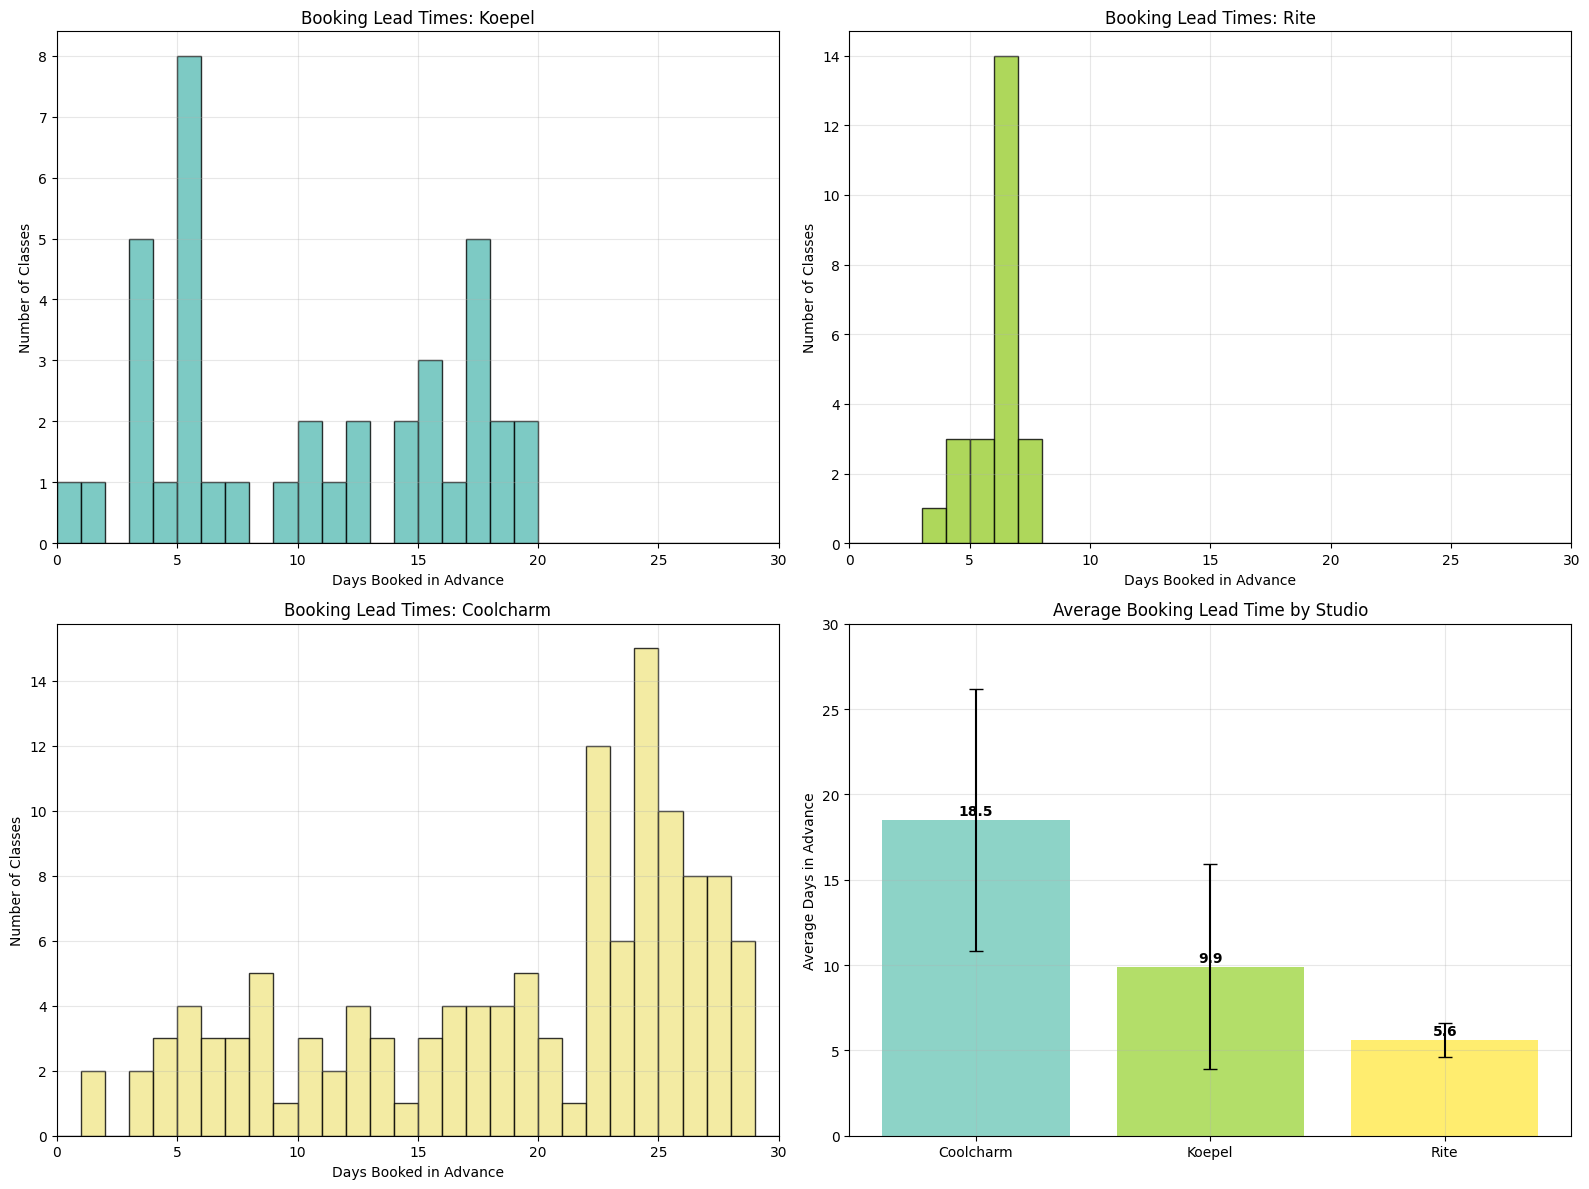


Summary statistics (0-30 days lead time):
   Studio  Classes Analyzed Avg Lead Time Max Lead Time Most Popular Hour
   Koepel                39      9.9 days       19 days             10:00
     Rite                24      5.6 days        7 days             11:00
Coolcharm               125     18.5 days       28 days              9:00


In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

def analyze_booking_velocity(df, studio_name, date_col='date', capacity_col=None, available_col=None, scrape_col='scrape_datetime'):
    """
    Analyze how far in advance classes get fully booked.

    Parameters:
    - df: DataFrame with class data
    - studio_name: Name of the studio for labeling
    - date_col: Column name containing class dates
    - capacity_col: Column with capacity info (format "available / total" or just numbers)
    - available_col: Column with available spots (if separate from capacity)
    - scrape_col: Column with scrape datetime
    """

    # Make a copy to avoid modifying original
    df = df.copy()

    # Convert scrape datetime
    df[scrape_col] = pd.to_datetime(df[scrape_col])

    # Parse date column based on studio format
    if studio_name.lower() == 'koepel':
        # Parse Dutch date format "maandag 05 mei"
        # First, let's assume current year (2025) and convert month names
        month_map = {
            'januari': 1, 'februari': 2, 'maart': 3, 'april': 4, 'mei': 5, 'juni': 6,
            'juli': 7, 'augustus': 8, 'september': 9, 'oktober': 10, 'november': 11, 'december': 12
        }

        def parse_dutch_date(date_str):
            try:
                parts = date_str.split()
                day = int(parts[1])
                month = month_map[parts[2].lower()]
                year = 2025  # Assuming current year
                return pd.to_datetime(f"{year}-{month:02d}-{day:02d}")
            except:
                return pd.NaT

        df[date_col] = df[date_col].apply(parse_dutch_date)

        # Parse capacity from "available / total" format
        if 'capacity' in df.columns:
            capacity_parts = df['capacity'].str.split(' / ', expand=True)
            df['available'] = pd.to_numeric(capacity_parts[0], errors='coerce')
            df['total'] = pd.to_numeric(capacity_parts[1], errors='coerce')

    elif studio_name.lower() == 'rite':
        # Already in good format, just ensure datetime
        df[date_col] = pd.to_datetime(df[date_col])

        # Parse availability if needed
        if 'availability' in df.columns and available_col not in df.columns:
            avail_parts = df['availability'].str.split(' / ', expand=True)
            df['available'] = pd.to_numeric(avail_parts[0], errors='coerce')
            df['total'] = pd.to_numeric(avail_parts[1], errors='coerce')
        elif available_col in df.columns:
            # Extract total from availability string
            if 'availability' in df.columns:
                avail_parts = df['availability'].str.split(' / ', expand=True)
                df['total'] = pd.to_numeric(avail_parts[1], errors='coerce')

    elif studio_name.lower() == 'coolcharm':
        # Parse date and availability
        df[date_col] = pd.to_datetime(df[date_col])

        if 'availability' in df.columns:
            avail_parts = df['availability'].str.split(' / ', expand=True)
            df['available'] = pd.to_numeric(avail_parts[0], errors='coerce')
            df['total'] = pd.to_numeric(avail_parts[1], errors='coerce')

    # Ensure we have the necessary columns
    if 'available' not in df.columns or 'total' not in df.columns:
        print(f"Warning: Could not parse availability data for {studio_name}")
        return None

    # Create unique class identifier
    if studio_name.lower() == 'koepel':
        df['class_id'] = df[date_col].dt.strftime('%Y-%m-%d') + '_' + df['time'] + '_' + df['instructor']
    elif studio_name.lower() == 'rite':
        df['class_id'] = df[date_col].dt.strftime('%Y-%m-%d') + '_' + df['hour'] + '_' + df['instructor'] + '_' + df['name']
    else:  # coolcharm
        df['class_id'] = df[date_col].dt.strftime('%Y-%m-%d') + '_' + df['time'] + '_' + df['class_name'] + '_' + df['location']

    # Filter for fully booked classes (available = 0)
    fully_booked = df[df['available'] == 0].copy()

    if fully_booked.empty:
        print(f"No fully booked classes found for {studio_name}")
        return None

    # For each fully booked class, find the earliest scrape date when it was full
    booking_velocity_data = []

    for class_id in fully_booked['class_id'].unique():
        class_data = fully_booked[fully_booked['class_id'] == class_id].copy()

        # Get the class date and earliest full booking scrape
        class_date = class_data[date_col].iloc[0]
        earliest_full_scrape = class_data[scrape_col].min()

        # Calculate days in advance
        # Fix: Ensure both are pandas Timestamps (or at least both datetime, not date)
        # If class_date or earliest_full_scrape is NaT, skip this entry
        if pd.isnull(class_date) or pd.isnull(earliest_full_scrape):
            continue
        # Remove .date() so both are Timestamps
        days_in_advance = (class_date.normalize() - earliest_full_scrape.normalize()).days

        # Get additional info for analysis
        total_capacity = class_data['total'].iloc[0]
        time_slot = class_data['time'].iloc[0] if 'time' in class_data.columns else class_data['hour'].iloc[0]
        instructor = class_data['instructor'].iloc[0] if 'instructor' in class_data.columns else 'Unknown'

        booking_velocity_data.append({
            'class_id': class_id,
            'class_date': class_date,
            'time_slot': time_slot,
            'instructor': instructor,
            'total_capacity': total_capacity,
            'earliest_full_scrape': earliest_full_scrape,
            'days_in_advance': days_in_advance,
            'studio': studio_name
        })

    # Only keep lead times in the range 0-30 days (inclusive)
    booking_velocity_df = pd.DataFrame(booking_velocity_data)
    booking_velocity_df = booking_velocity_df[
        (booking_velocity_df['days_in_advance'] >= 0) & (booking_velocity_df['days_in_advance'] <= 30)
    ].reset_index(drop=True)

    return booking_velocity_df

def plot_booking_velocity_analysis(velocity_dfs, studio_names):
    """
    Create visualizations for booking velocity analysis across studios.
    """
    # Combine all data
    all_data = []
    for df, name in zip(velocity_dfs, studio_names):
        if df is not None and not df.empty:
            all_data.append(df)

    if not all_data:
        print("No booking velocity data available for analysis")
        return

    combined_df = pd.concat(all_data, ignore_index=True)

    # Only keep lead times in the range 0-30 days (inclusive) for all plots
    combined_df = combined_df[(combined_df['days_in_advance'] >= 0) & (combined_df['days_in_advance'] <= 30)].copy()

    # Create subplots: 1 row per studio for histograms, then 2 more plots
    n_studios = len(studio_names)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Separate histograms for each studio
    max_days = 30
    colors = [
        '#5DBDB6',  # Teal/turquoise for Coolcharm
        '#9ACD32',  # Light green/lime for Koepel
        '#F0E68C'   # Yellow for Rite
    ]
    for i, studio in enumerate(studio_names):
        ax = axes[0, 0] if i == 0 else axes[0, 1] if i == 1 else None
        studio_data = combined_df[combined_df['studio'] == studio]['days_in_advance']
        # Only include data in 0-30 range (already filtered above)
        color = colors[i] if i < len(colors) else None
        if ax is not None:
            ax.hist(studio_data, bins=range(0, max_days + 2), alpha=0.8, color=color, edgecolor='black')
            ax.set_xlabel('Days Booked in Advance')
            ax.set_ylabel('Number of Classes')
            ax.set_title(f'Booking Lead Times: {studio}')
            ax.grid(True, alpha=0.3)
            ax.set_xlim(0, max_days)
        else:
            # If more than 2 studios, add more subplots as needed
            # For now, just plot the 3rd studio in axes[1,0]
            ax = axes[1, 0]
            ax.hist(studio_data, bins=range(0, max_days + 2), alpha=0.8, color=color, edgecolor='black')
            ax.set_xlabel('Days Booked in Advance')
            ax.set_ylabel('Number of Classes')
            ax.set_title(f'Booking Lead Times: {studio}')
            ax.grid(True, alpha=0.3)
            ax.set_xlim(0, max_days)

    # 2. Average booking lead time by studio (bar plot)
    ax_bar = axes[1, 1]
    avg_lead_times = combined_df.groupby('studio')['days_in_advance'].agg(['mean', 'std']).round(1)
    colors = plt.cm.Set3(np.linspace(0, 1, len(avg_lead_times)))
    bars = ax_bar.bar(avg_lead_times.index, avg_lead_times['mean'],
                      yerr=avg_lead_times['std'], capsize=5, color=colors[:len(avg_lead_times)])
    ax_bar.set_ylabel('Average Days in Advance')
    ax_bar.set_title('Average Booking Lead Time by Studio')
    ax_bar.grid(True, alpha=0.3)
    ax_bar.set_ylim(0, max_days)

    # Add value labels on bars
    for bar, mean_val in zip(bars, avg_lead_times['mean']):
        ax_bar.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{mean_val:.1f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Summary statistics table (print to console)
    summary_stats = []
    for studio in studio_names:
        studio_data = combined_df[combined_df['studio'] == studio]
        if not studio_data.empty:
            # Compute Most Popular Hour safely, avoiding f-string backslash in expression
            if not studio_data['time_slot'].isnull().all():
                # Extract hour as integer (first number in time_slot)
                hour_extracted = studio_data['time_slot'].str.extract(r'(\d{1,2})')[0]
                hour_extracted = pd.to_numeric(hour_extracted, errors='coerce')
                if not hour_extracted.dropna().empty:
                    most_popular_hour = f"{int(hour_extracted.mode().iloc[0])}:00"
                else:
                    most_popular_hour = 'N/A'
            else:
                most_popular_hour = 'N/A'
            stats = {
                'Studio': studio,
                'Classes Analyzed': len(studio_data),
                'Avg Lead Time': f"{studio_data['days_in_advance'].mean():.1f} days",
                'Max Lead Time': f"{studio_data['days_in_advance'].max()} days",
                'Most Popular Hour': most_popular_hour
            }
        else:
            stats = {
                'Studio': studio,
                'Classes Analyzed': 0,
                'Avg Lead Time': 'N/A',
                'Max Lead Time': 'N/A',
                'Most Popular Hour': 'N/A'
            }
        summary_stats.append(stats)
    summary_df = pd.DataFrame(summary_stats)
    print("\nSummary statistics (0-30 days lead time):")
    print(summary_df.to_string(index=False))

    return combined_df

# Main analysis function
def run_booking_velocity_analysis(koepel_df, rite_df, coolcharm_df):
    """
    Run the complete booking velocity analysis for all studios.
    """
    print("Analyzing booking velocity for all studios...")

    # Analyze each studio
    koepel_velocity = analyze_booking_velocity(koepel_df, 'Koepel')
    rite_velocity = analyze_booking_velocity(rite_df, 'Rite')
    coolcharm_velocity = analyze_booking_velocity(coolcharm_df, 'Coolcharm')

    # Print individual results
    for df, name in [(koepel_velocity, 'Koepel'), (rite_velocity, 'Rite'), (coolcharm_velocity, 'Coolcharm')]:
        if df is not None and not df.empty:
            print(f"\n{name} - Fully Booked Classes Found (0-30 days): {len(df)}")
            print(f"Average booking lead time: {df['days_in_advance'].mean():.1f} days")
            print(f"Range: {df['days_in_advance'].min()}-{df['days_in_advance'].max()} days")
        else:
            print(f"\n{name} - No fully booked classes found in the dataset (0-30 days)")

    # Create visualizations
    velocity_dfs = [koepel_velocity, rite_velocity, coolcharm_velocity]
    studio_names = ['Koepel', 'Rite', 'Coolcharm']

    combined_results = plot_booking_velocity_analysis(velocity_dfs, studio_names)

    return {
        'koepel': koepel_velocity,
        'rite': rite_velocity,
        'coolcharm': coolcharm_velocity,
        'combined': combined_results
    }

# Usage example:
results = run_booking_velocity_analysis(koepel_df, rite_df, coolcharm_df)


In [314]:
results['coolcharm'][results['coolcharm']['class_date'] == "2025-07-03"]


,class_id,class_date,time_slot,instructor,total_capacity,earliest_full_scrape,days_in_advance,studio
104,2025-07-03_09:00 - 09:55_Reformer Mixed Level ...,2025-07-03,09:00 - 09:55,NaN,5,2025-06-08 10:09:02,25,Coolcharm
105,2025-07-03_19:30 - 20:25_Tower Intermediate (L...,2025-07-03,19:30 - 20:25,NaN,5,2025-06-08 10:09:02,25,Coolcharm
112,2025-07-03_19:30 - 20:25_Chair en Mat (all lev...,2025-07-03,19:30 - 20:25,NaN,5,2025-06-12 04:09:20,21,Coolcharm


In [320]:
#

# Parse date and availability
coolcharm_df['date'] = pd.to_datetime(coolcharm_df['date'], errors='coerce')

if 'availability' in coolcharm_df.columns:
    avail_parts = coolcharm_df['availability'].str.split(' / ', expand=True)
    coolcharm_df['available'] = pd.to_numeric(avail_parts[0], errors='coerce')
    coolcharm_df['total'] = pd.to_numeric(avail_parts[1], errors='coerce')

# Show output
print("\nOutput DataFrame (first 5 rows):")
coolcharm_df[(coolcharm_df['date'] == "2025-07-03") & (coolcharm_df['available'] == coolcharm_df['total'])]


Output DataFrame (first 5 rows):


,date,time,class_name,location,availability,booking_status,name,hour,address,instructor,file_name,scrape_datetime,type,status,available,total
16010,2025-07-03,17:30 - 18:25,Reformer Advanced (Level 3),Genk,5 / 5,Full,NaN,NaN,NaN,NaN,coolcharm_schedule_20250618_101012.json,2025-06-18 10:10:12,NaN,NaN,5,5
